In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sea
import pandas as pd
import os
from astropy.io import fits
from astropy.table import Table
import img_scale
from glob import glob
from astropy.wcs import wcs
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

CO(2-1): $\lambda$ 1.3 mm / 1300 $\mu$m

Band 3 84-116 Ghz /  2600-3600 $\mu$m

In [73]:
2600 / 1300 - 1, 3600 / 1300 - 1, 1300/3E2

(1.0, 1.7692307692307692, 4.333333333333333)

In [3]:
v4S = Table.read(fits.open('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Eazy/goodss_3dhst.v4.4.zout.fits'),
                 format='fits').to_pandas()

v4Scat = Table.read('/Volumes/Vince_CLEAR/3dhst_V4.4/goodss_3dhst.v4.4.cats/Catalog/goodss_3dhst.v4.4.cat',
                 format='ascii').to_pandas()

In [4]:
v4S['use'] = v4Scat['use_phot']
v4S['star'] = v4Scat['class_star']

In [5]:
filesS = glob('/Volumes/Vince_CLEAR/RELEASE_v2.0.0/*S*/*/Prep/*full.png')

allSids = [int(os.path.basename(U).replace('.full.png','').split('_')[1]) for U in filesS]

Sids = np.array(list(set(allSids)))

Spresent = [U in Sids for U in v4S.id]

v4S['R2'] = Spresent

In [6]:
fileS_v1 = glob('/Users/vestrada/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*')
allSids_v1 = [int(os.path.basename(U).replace('.1D.fits','').split('_')[1]) for U in fileS_v1]

Sids_v1 = np.array(list(set(allSids_v1)))
Spresent_v1 = [U in Sids_v1 for U in v4S.id]
v4S['R1'] = Spresent_v1

In [7]:
3 < 4 and v4S.R2[0] or v4S.R1[0]

False

[0, 2.5, 0.5, 2.5]

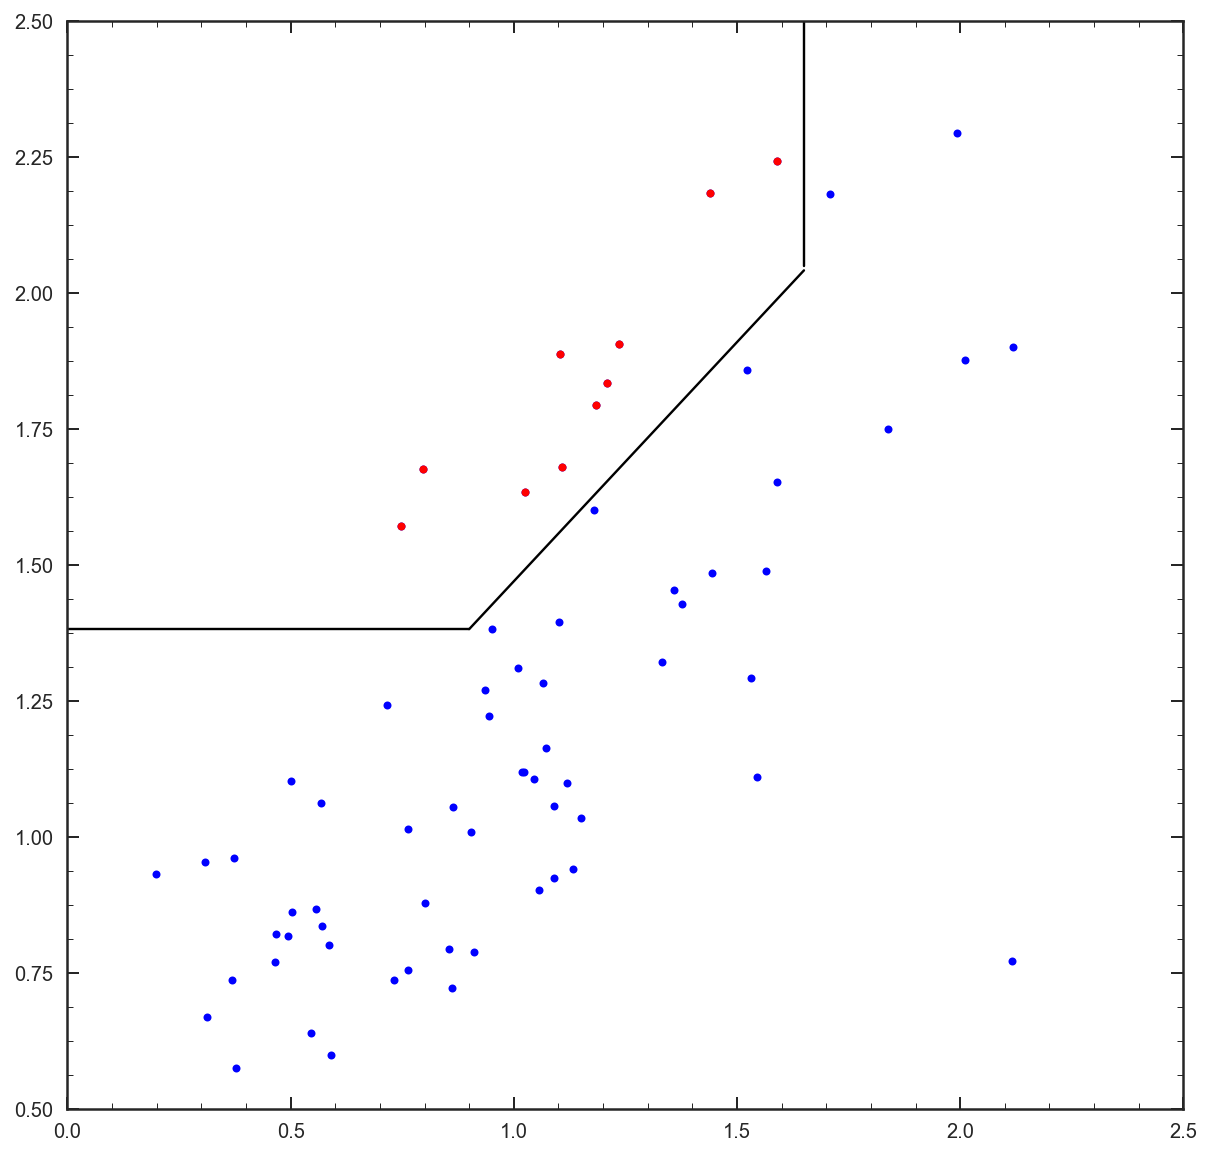

In [8]:
v4S_red = v4S.query('mass > 10**9.8 and 1.5 < z500 < 1.7 and use == 1 and star < 0.8')
v4S_red = v4S_red.query('R2 == True or R1 == True')
def Color(band1, band2):
    m1=-2.5*np.log10(band1)
    m2=-2.5*np.log10(band2)
    return m1-m2

SUV = Color(v4S_red.restU, v4S_red.restV)
SVJ = Color(v4S_red.restV, v4S_red.restJ)

SQ = []
Ssf = []

for i in SUV.index:
    if SUV[i]>=0.88*SVJ[i]+0.59 and SUV[i]>1.382 and SVJ[i]<1.65:
        SQ.append(i)
    else:
        Ssf.append(i)
        
plt.figure(figsize=[10,10])
plt.plot(SVJ, SUV,'bo',ms=4)

plt.plot(SVJ[SQ], SUV[SQ],'ro',ms=4)

plt.plot([0,.9],[1.382,1.382],'k',lw=1.2)
plt.plot([1.65,1.65],[2.05,2.5],'k',lw=1.2)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=1.2)
plt.axis([0,2.5,.5,2.5])

In [9]:
SQ_up = np.array([26271, 29256, 38842, 39011, 39363, 40222, 41519, 42112, 42777, 43006, 44041])

In [10]:
len(v4S_red.ra[SQ_up])

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


11

In [12]:
sflts = glob(hpath + 'Clear_data/s_flt_files/*')

dat = fits.open(sflts[0])

dat[0].header['TARGNAME']

def flt_pos(fn):
    flt=fits.open(fn)
    w = wcs.WCS(flt[1].header)

    xpixlim=len(flt[1].data[0])
    ypixlim=len(flt[1].data)

    pos=w.wcs_pix2world([[0,0],[xpixlim, 0],[xpixlim, ypixlim],[0, ypixlim]],1)
            
    return pos

allpos = np.zeros([len(sflts),2,5])

for i in range(len(sflts)):
    p1,p2,p3,p4 = flt_pos(sflts[i])
    allpos[i] = np.array([p1,p2,p3,p4,p1]).T
#     plt.plot(allpos[0],allpos[1], 'k',alpha = 0.1,zorder=1)

# plt.scatter(v4S.ra[SQ_up],v4S.dec[SQ_up],marker='*', s=200, color = 'r')

## img pull

In [13]:
seg = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_seg.fits')[0].data
f160 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F160W_orig_sci.fits')[0].data
f140 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F140W_orig_sci.fits')[0].data
f125 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss_3dhst.v4.0.F125W_orig_sci.fits')[0].data
f105 = fits.open('/Volumes/Vince_CLEAR/gsd_img/goodss-F105W-astrodrizzle-v4.4_drz_sci.fits')[0].data

In [61]:
v4S.id[SQ_up].values

array([26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,
       43007, 44042])

img_scale : asinh
img_scale : asinh
img_scale : asinh


Text(0.5,1,'Blue = F105W, Green = F125W, Red = F160W, GSD-26272')

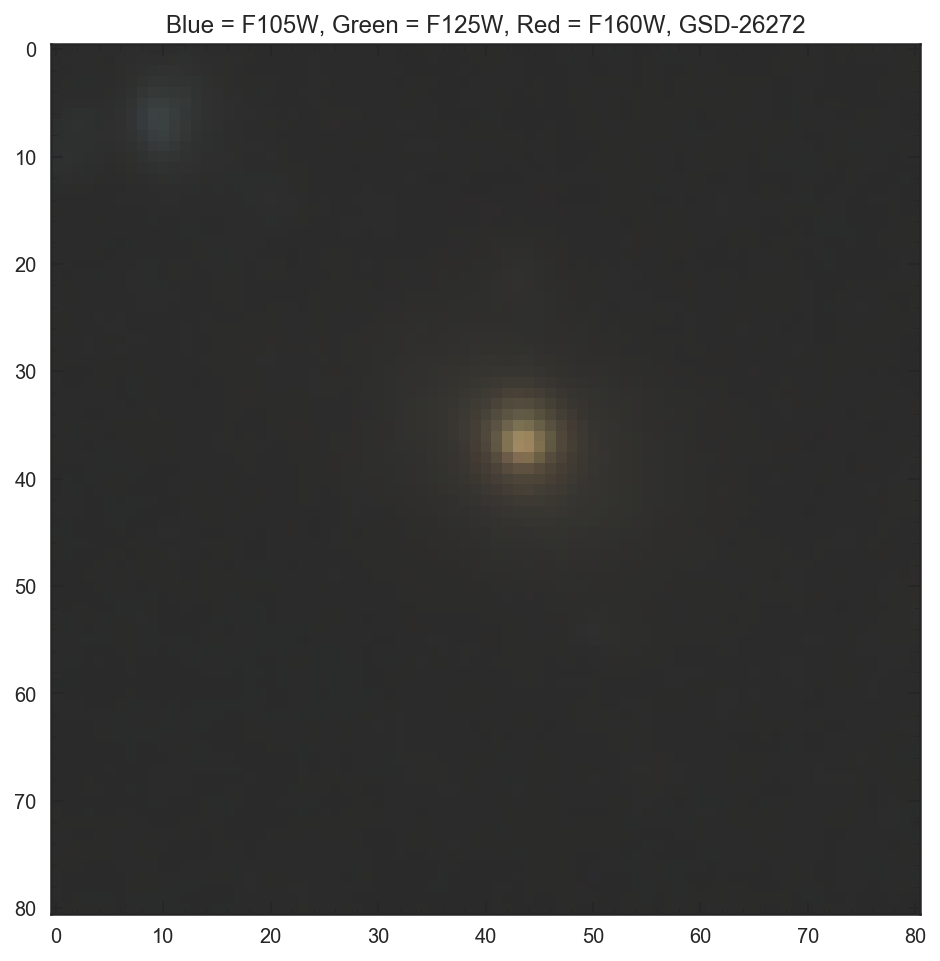

In [29]:
gids = v4S.id[SQ_up].values

i =gids[0]
# for i in gids:
idx = np.argwhere(seg == i)

ycnt =int((max(idx.T[0]) + min(idx.T[0])) / 2)
xcnt = int((max(idx.T[1]) + min(idx.T[1])) / 2)

f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

plt.figure(figsize=[8,8])
plt.imshow(img,aspect='equal')
plt.title('Blue = F105W, Green = F125W, Red = F160W, GSD-{0}'.format(i))

In [42]:
np.arange(min(idx.T[0]), max(idx.T[0]) + 1, 1)[34]

11469

img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh
img_scale : asinh


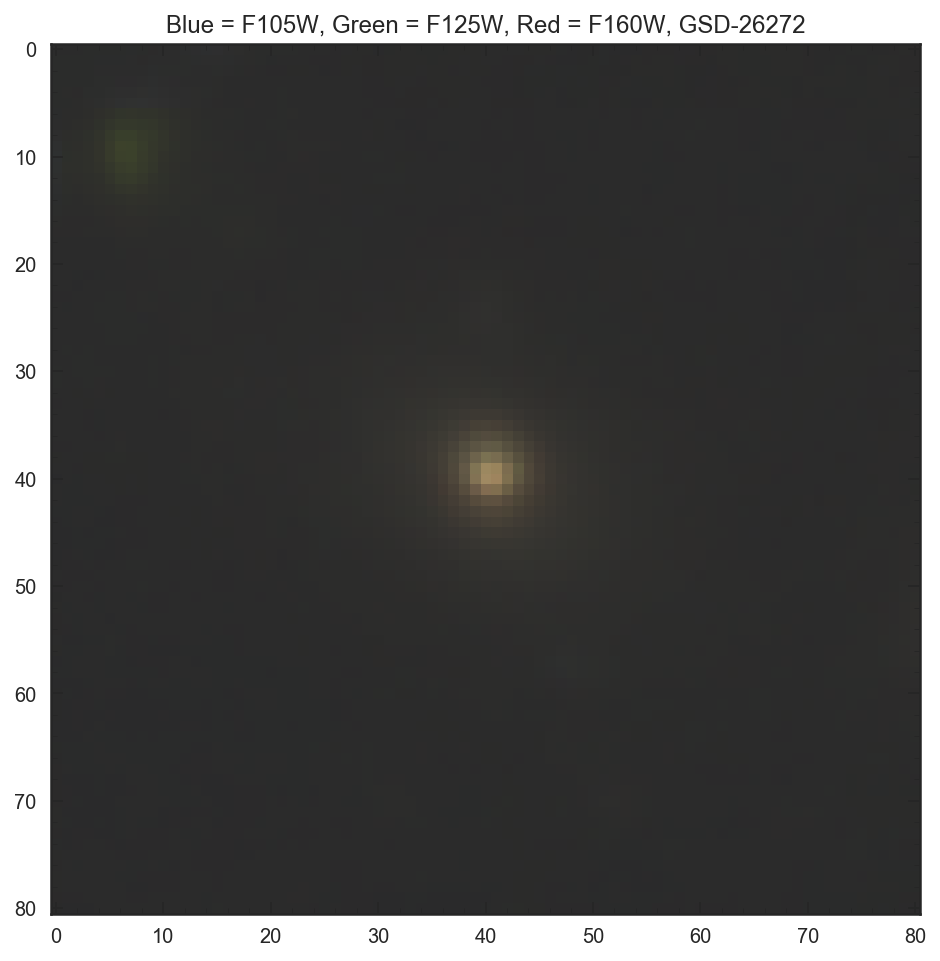

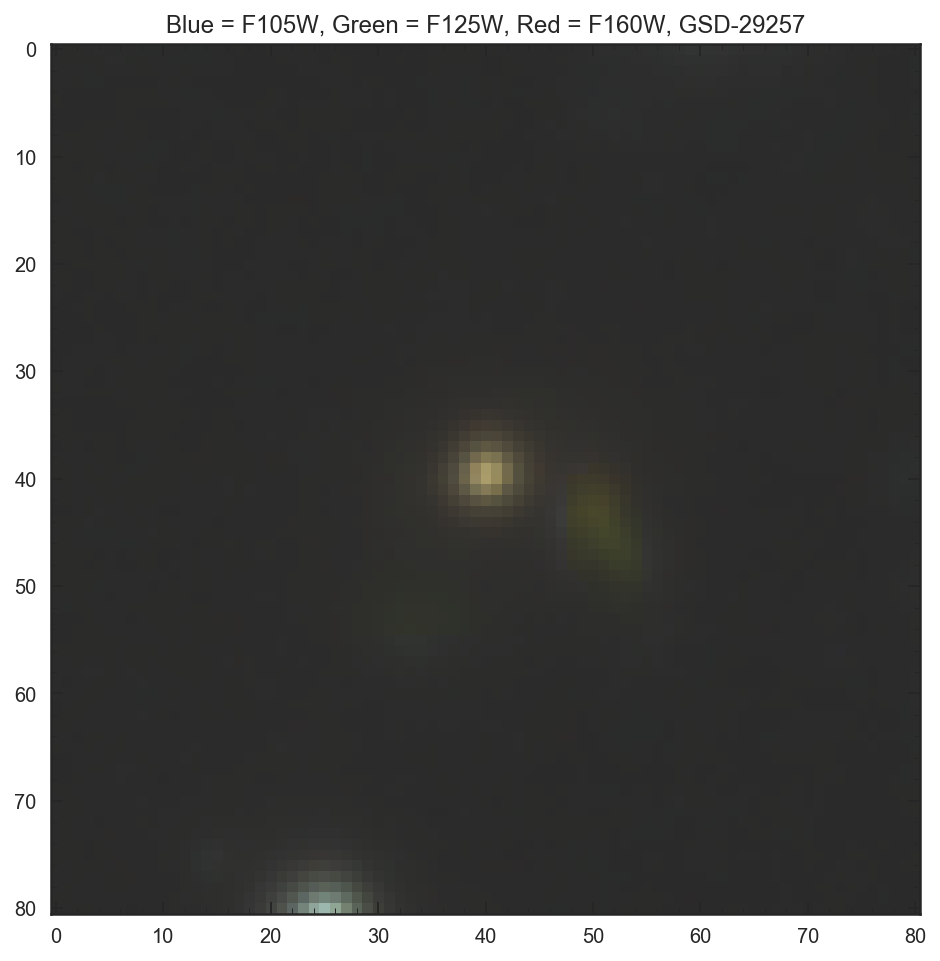

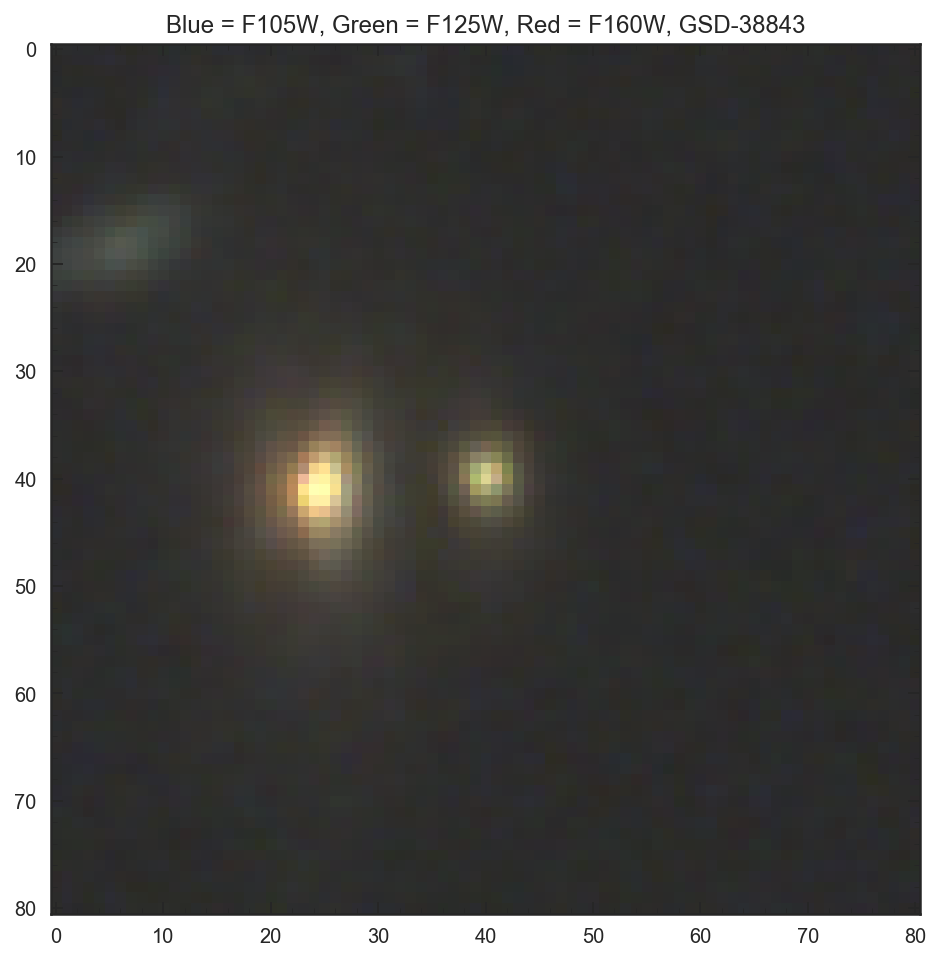

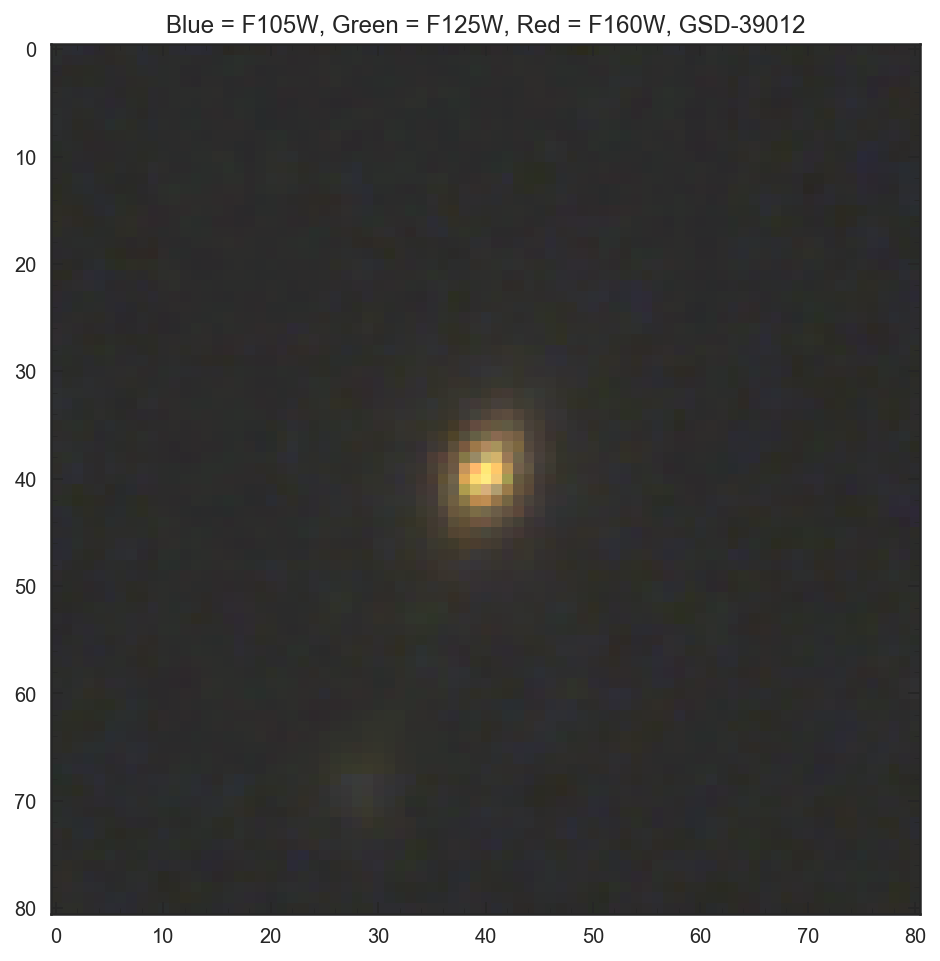

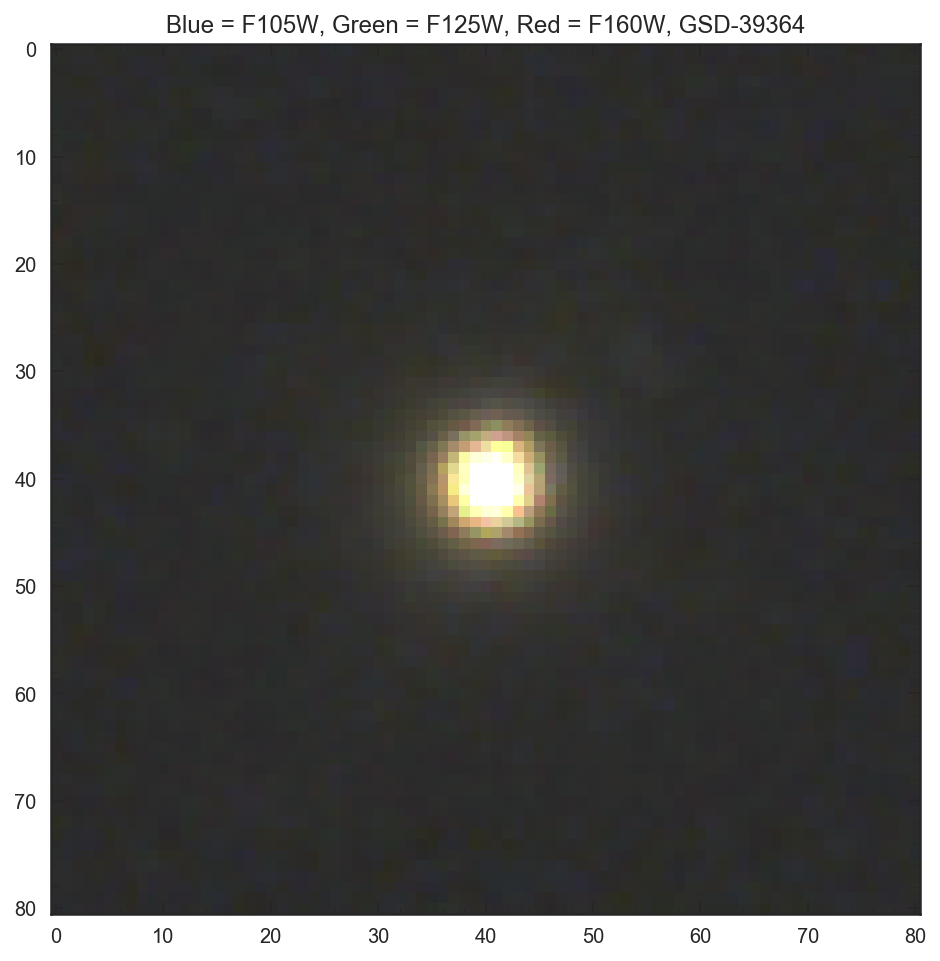

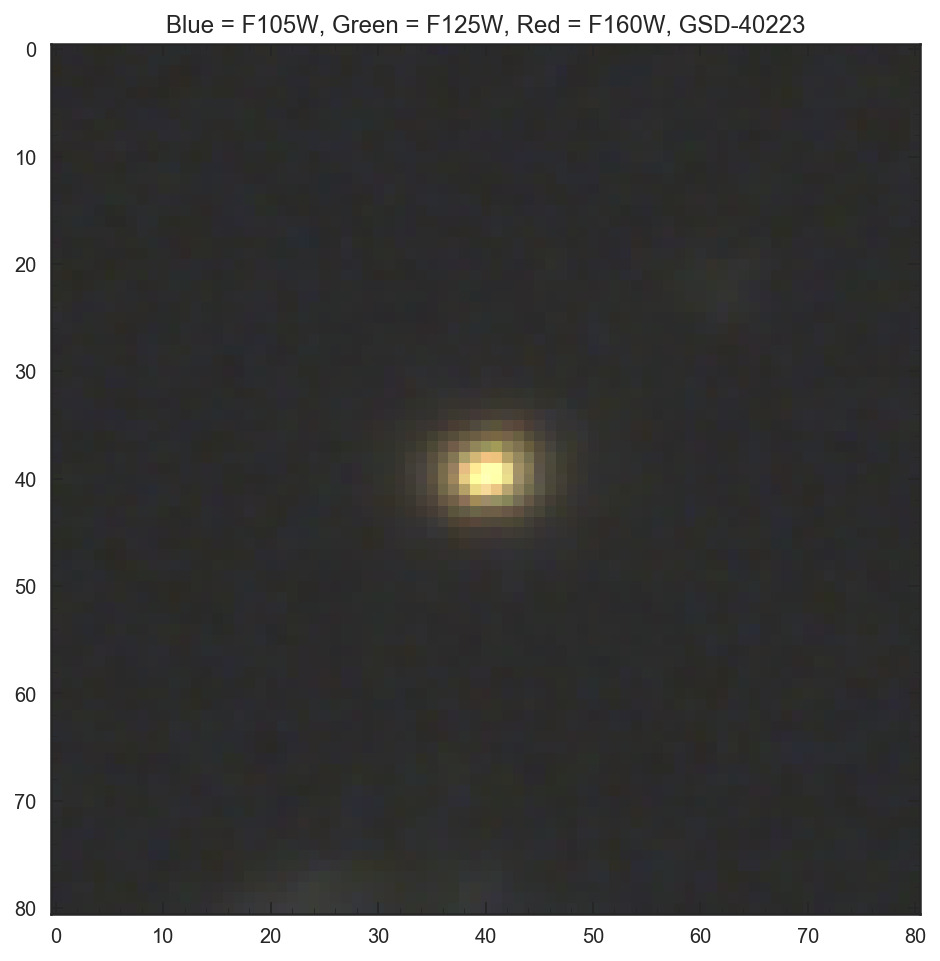

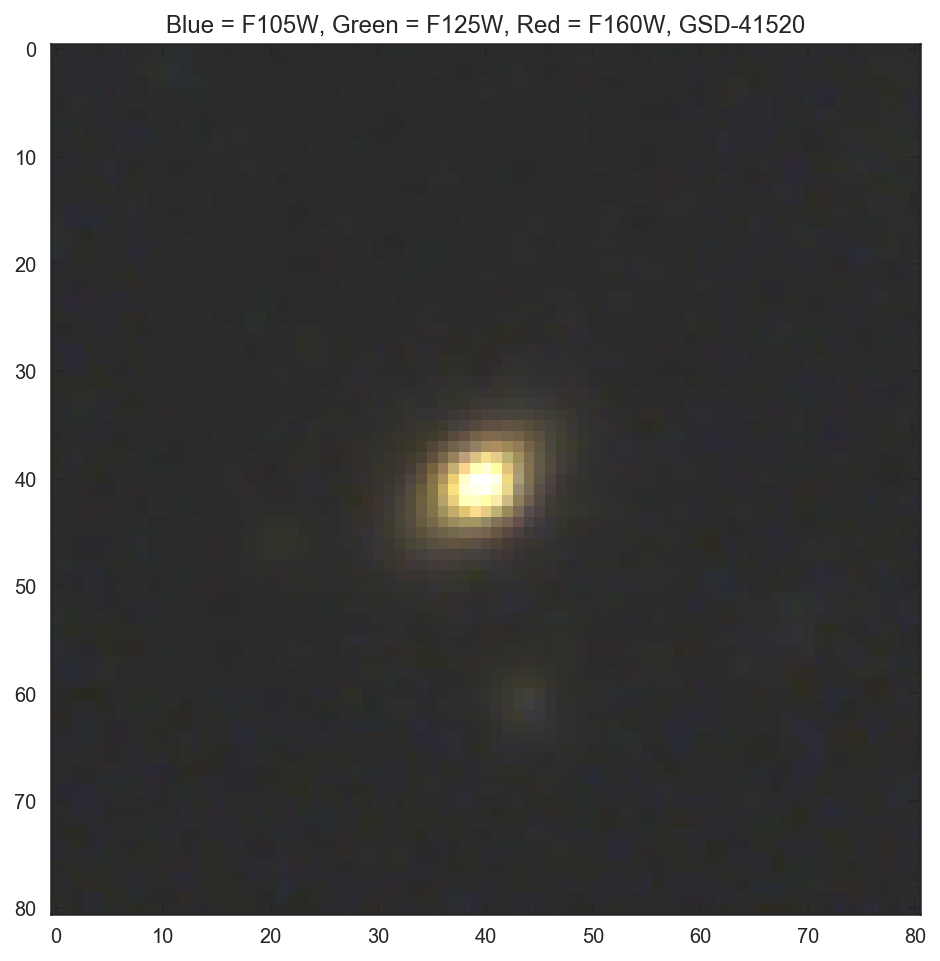

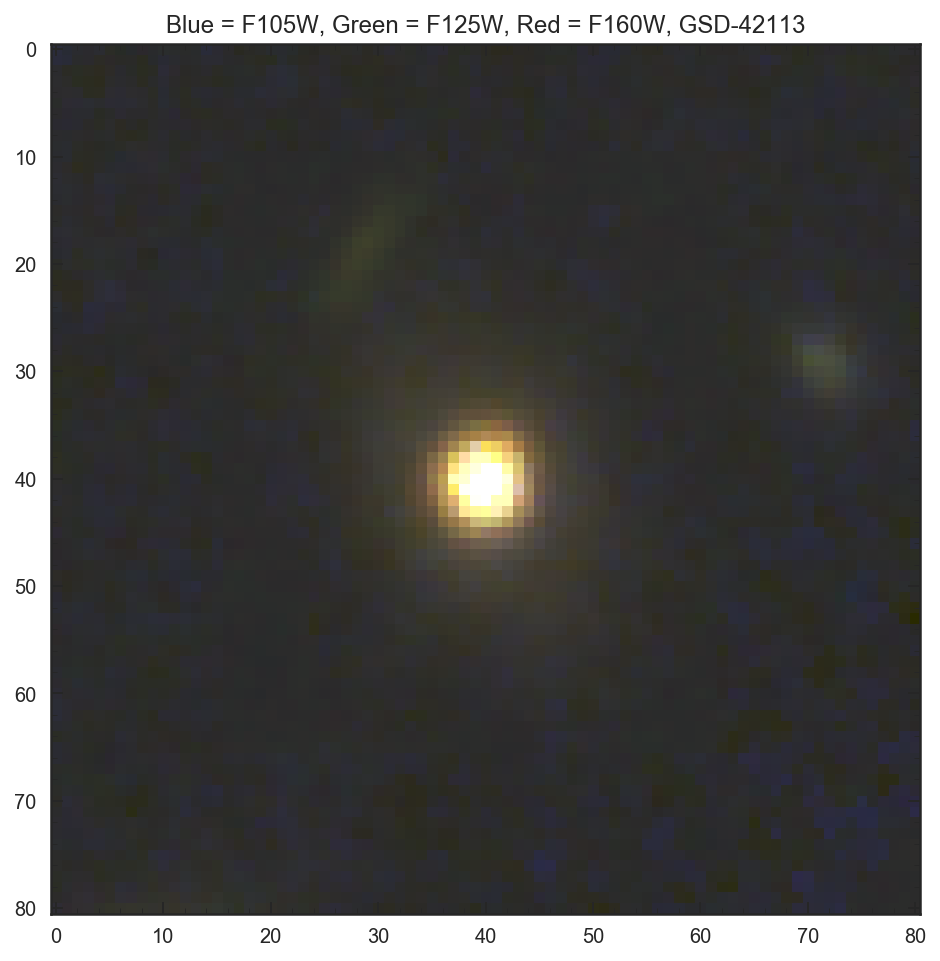

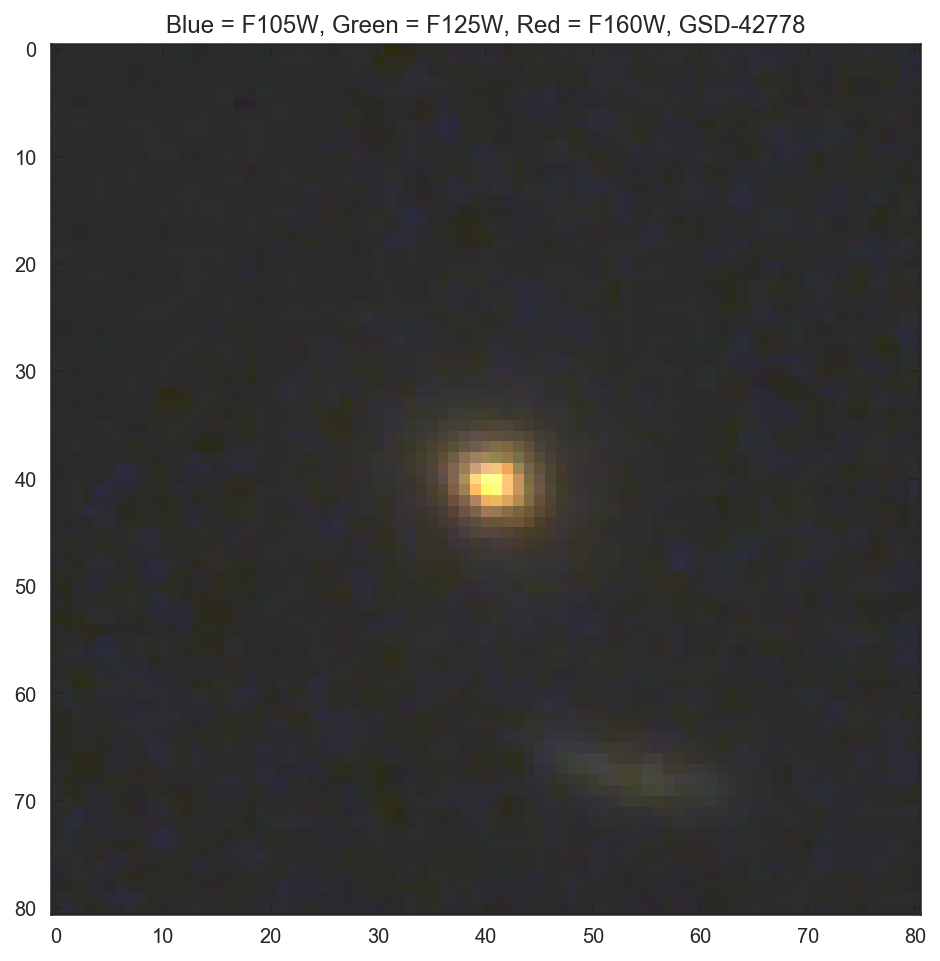

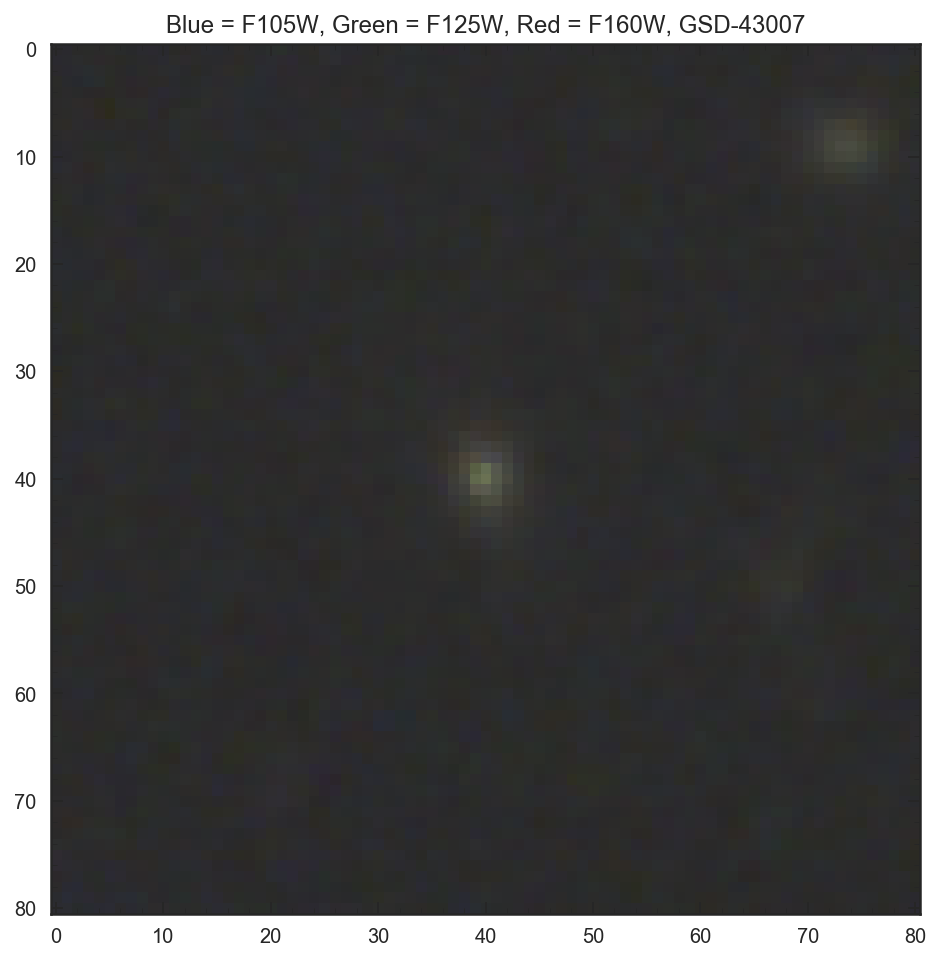

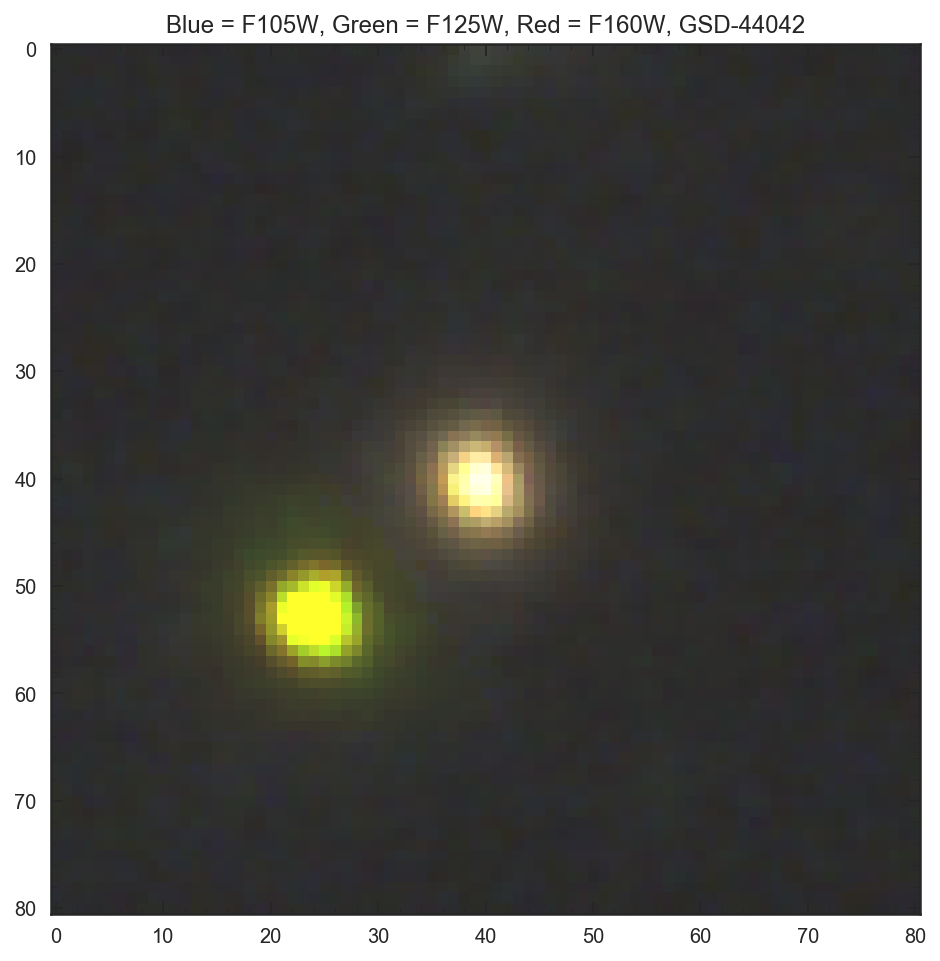

In [44]:
gids = v4S.id[SQ_up].values

for i in gids:
    idx = np.argwhere(seg == i)

    ylist = np.arange(min(idx.T[0]), max(idx.T[0]) + 1, 1)
    xlist = np.arange(min(idx.T[1]), max(idx.T[1]) + 1, 1)

    segimg = seg[min(idx.T[0]): max(idx.T[0]), min(idx.T[1]): max(idx.T[1])]
    f105img = f105[min(idx.T[0]): max(idx.T[0]), min(idx.T[1]): max(idx.T[1])]
    f105img[segimg != i] = 0
    maxloc = np.argwhere(f105img == np.max(f105img))[0]

    ycnt = ylist[maxloc[0]]
    xcnt = xlist[maxloc[1]]

    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]


    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.figure(figsize=[8,8])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W, GSD-{0}'.format(i))

In [17]:
from spec_extract import Stack
import fsps
def Extract_phot(catalog, galaxy_id, masterlist = '../phot/master_template_list.pkl'):

    galdf = catalog[catalog.id == galaxy_id]
    master_tmp_df = pd.read_pickle(masterlist)

    pre= 'S_'

    eff_wv = []
    phot_fl = []
    phot_er = []
    phot_num = []

    for i in galdf.keys():
        if i[0:2] == 'f_':
            Clam = 3E18 / master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0] **2 * 10**((-1.1)/2.5-29)
            if galdf[i].values[0] > -99.0:
                eff_wv.append(master_tmp_df.eff_wv[master_tmp_df.tmp_name == pre + i].values[0])
                phot_fl.append(galdf[i].values[0]*Clam)
                phot_num.append(master_tmp_df.tmp_num[master_tmp_df.tmp_name == pre + i].values[0])
        if i[0:2] == 'e_':
            if galdf[i].values[0] > -99.0:
                phot_er.append(galdf[i].values[0]*Clam)
    
    np.save('../Alma_files/GSD_{0}_phot'.format(galaxy_id),[eff_wv,phot_fl,phot_er,phot_num])

    return eff_wv,phot_fl,phot_er,phot_num

def Extract_spec_R2(galaxy_id):
    spec_list = glob('/Volumes/Vince_CLEAR/RELEASE_v2.1.0/*S*/*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft, Bln, Bct = [[],[],[],[],[],[]]

    Rwv, Rfl, Rer, Rft, Rln, Rct = [[],[],[],[],[],[]]

    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        try:
            Bwv.append(np.array(dat['G102'].data['wave']).T)
            Bfl.append(np.array(dat['G102'].data['flux']).T)
            Ber.append(np.array(dat['G102'].data['err']).T)
            Bft.append(np.array(dat['G102'].data['flat']).T)
            Bln.append(np.array(dat['G102'].data['line']).T)
            Bct.append(np.array(dat['G102'].data['cont']).T)

        except:
            print('no g102')

        try:
            Rwv.append(np.array(dat['G141'].data['wave']).T)
            Rfl.append(np.array(dat['G141'].data['flux']).T)
            Rer.append(np.array(dat['G141'].data['err']).T)
            Rft.append(np.array(dat['G141'].data['flat']).T)
            Rln.append(np.array(dat['G141'].data['line']).T)
            Rct.append(np.array(dat['G141'].data['cont']).T)

        except:
            print('no g141')

    if len(Bwv) > 0:                
        SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, Bln, Bct)
        np.save('../Alma_files/GSD_{0}_g102'.format(galaxy_id),[SBW, SBF, SBE, SBT, SBL, SBC])
        IDB = [U for U in range(len(SBW)) if 8750 < SBW[U] < 11350]


    if len(Rwv) > 0:     
        SRW, SRF, SRE, SRT, SRL, SRC = Stack(Rwv, Rfl, Rer, Rft, Rln, Rct)
        np.save('../Alma_files/GSD_{0}_g141'.format(galaxy_id),[SRW, SRF, SRE, SRT, SRL, SRC])        
        IDR = [U for U in range(len(SRW)) if 11300 < SRW[U] < 16500]
        
        
    if len(Bwv) > 0 and len(Rwv) > 0:
        return SBW[IDB], SBF[IDB] / SBT[IDB], SBE[IDB] / SBT[IDB], SRW[IDR], SRF[IDR] / SRT[IDR], SRE[IDR] / SRT[IDR]
        
    if len(Bwv) > 0 and not len(Rwv) > 0:
        return SBW[IDB], SBF[IDB] / SBT[IDB], SBE[IDB] / SBT[IDB]
        
    if len(Rwv) > 0 and not len(Bwv) > 0:
        return SRW[IDR], SRF[IDR] / SRT[IDR], SRE[IDR] / SRT[IDR]


def Extract_spec_R1(galaxy_id):
    spec_list = glob('/Volumes/Vince_research/Data/CLEAR/RELEASE_v1.0.0/COMBINED/1D/FITS/*S*{0}*1D.fits'.format(galaxy_id))

    Bwv, Bfl, Ber, Bft = [[],[],[],[]]


    for i in range(len(spec_list)):
        dat = fits.open(spec_list[i])

        Bwv.append(np.array(dat[1].data['wave']))
        Bfl.append(np.array(dat[1].data['flux']) - np.array(dat[1].data['contam']))
        Ber.append(np.array(dat[1].data['error']))
        Bft.append(np.array(dat[1].data['sensitivity']))


    SBW, SBF, SBE, SBT, SBL, SBC = Stack(Bwv, Bfl, Ber, Bft, np.ones_like(Bwv), np.ones_like(Bwv))
    np.save('../Alma_files/GSD_{0}_g102'.format(galaxy_id),[SBW, SBF* 1E-17, SBE* 1E-17, SBT, SBL, SBC])

    IDB = [U for U in range(len(SBW)) if 8750 < SBW[U] < 11350]

    return SBW[IDB], SBF[IDB] / SBT[IDB] * 1E-17, SBE[IDB] / SBT[IDB] * 1E-17

In [15]:
gals = [26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,43007, 44042]
for i in gals:
    Extract_spec_R2(i)


/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:41: RuntimeWarning: divide by zero encountered in power
  weigrid = errgrid ** (-2)
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:48: RuntimeWarning: invalid value encountered in double_scalars
  stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:49: RuntimeWarning: invalid value encountered in double_scalars
  stack_flat[i] = np.sum(fltgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:50: RuntimeWarning: invalid value encountered in double_scalars
  stack_line[i] = np.sum(linegrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_field/scripts/spec_extract.py:51: RuntimeWarning: invalid value encountered in double_scalars
  stack_cont[i] = np.sum(contgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
/Users/vestrada/Github/Cluster_and_fiel

no g102
no g102
no g102
no g102
no g102


In [17]:
dat = fits.open(spec_list[0])

In [18]:
wv = dat[1].data['wave']
fl = dat[1].data['flux']
er = dat[1].data['error']
cntm = dat[1].data['contam']
sens = dat[1].data['sensitivity']

<ErrorbarContainer object of 3 artists>

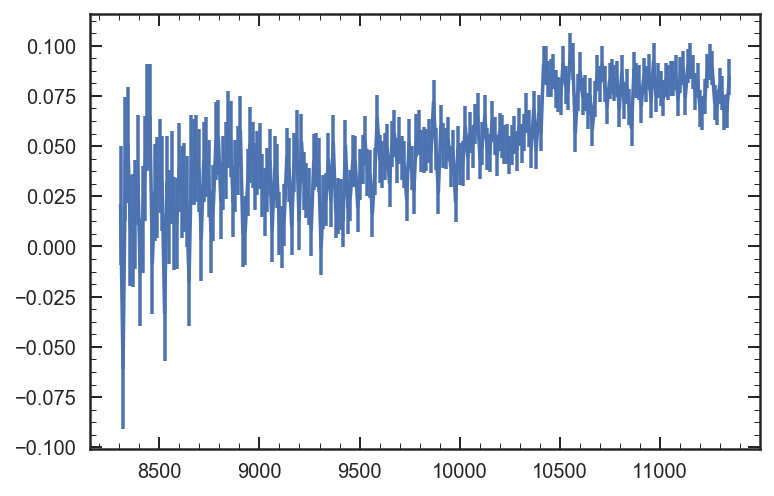

In [34]:
IDX = [U for U in range(len(wv)) if 8300 < wv[U] < 11350]

plt.errorbar(wv[IDX],(fl[IDX] - cntm[IDX]) / sens[IDX],er[IDX]/ sens[IDX])

# Build plotting code

In [32]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1),sfh = 0)

def PLOT(galaxy_id, lims = None, savefig = True):
    z,pz = np.load('../data/posteriors/ALMA_{0}_Pz.npy'.format(galaxy_id))
    t,pt = np.load('../data/posteriors/ALMA_{0}_Pa.npy'.format(galaxy_id))
    m,pm = np.load('../data/posteriors/ALMA_{0}_Pm.npy'.format(galaxy_id))

    bfz = z[pz == max(pz)]
    bft = t[pt == max(pt)]
    bfm = m[pm == max(pm)]

    Gs = Gen_ALMA_spec(galaxy_id, bfz, g102_lims=[8750,11300], g141_lims=[lims[0],lims[1]], mdl_err=False)

    sp.params['logzsol'] = np.log10( bfm )
    
    wave, flux = sp.get_spectrum(tage = bft, peraa = True)

    Gs.Sim_all_premade(wave * (1 + bfz),flux)
    
    gs = GridSpec(2,3, hspace=0.3, wspace = 0.3)   

    plt.figure(figsize=[14,10])
    plt.subplot(gs[0,:])
    plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl*1E18,Gs.Ber*1E18,
                    linestyle='None', marker='o', markersize=3, color='#377eb8',zorder = 2, label = 'CLEAR G102') 
    if Gs.g141:
        plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl*1E18,Gs.Rer*1E18,
                        linestyle='None', marker='o', markersize=3, color='#e41a1c',zorder = 2, label = '3D-HST G141')
    
    plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
                                     linestyle='None', marker='o', markersize=10, color='#4daf4a',zorder = 1, label = '3D-HST Photometry')

    plt.plot(np.log10(Gs.Bwv_rf),Gs.Bmfl*1E18,'k')
    if Gs.g141:
        plt.plot(np.log10(Gs.Rwv_rf),Gs.Rmfl*1E18,'k')
    plt.plot(np.log10(Gs.Pwv_rf),Gs.Pmfl*1E18,'ko')
    plt.xticks(np.log10([2500,5000,7500,10000,25000]),[2500,5000,7500,10000,25000])
    plt.ylim(0,max(Gs.Pflx*1E18) * 1.5)            
    plt.title(galaxy_id, fontsize=25)
    plt.xlabel('Wavelength ($\AA$)', fontsize=20)
    plt.ylabel('F$_\lambda$ ($10^{-18}$ $erg/s/cm^{2}/\AA $)', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)

    ###############img plot################
    idx = np.argwhere(seg == galaxy_id)

    ylist = np.arange(min(idx.T[0]), max(idx.T[0]) + 1, 1)
    xlist = np.arange(min(idx.T[1]), max(idx.T[1]) + 1, 1)

    segimg = seg[min(idx.T[0]): max(idx.T[0]), min(idx.T[1]): max(idx.T[1])]
    f105img = f105[min(idx.T[0]): max(idx.T[0]), min(idx.T[1]): max(idx.T[1])]
    f105img[segimg != galaxy_id] = 0
    maxloc = np.argwhere(f105img == np.max(f105img))[0]

    ycnt = ylist[maxloc[0]]
    xcnt = xlist[maxloc[1]]

    f105img = f105[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f125img = f125[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]
    f160img = f160[ycnt - 40: ycnt + 41, xcnt - 40: xcnt + 41]

    img = np.zeros((f125img.shape[0], f125img.shape[1], 3), dtype=float)
    img[:,:,0] = img_scale.asinh(f160img, scale_min=-0.1, scale_max=0.5)
    img[:,:,1] = img_scale.asinh(f125img, scale_min=-0.1, scale_max=0.5)
    img[:,:,2] = img_scale.asinh(f105img, scale_min=-0.1, scale_max=0.5)

    plt.subplot(gs[1,0])
    plt.imshow(img,aspect='equal')
    plt.title('Blue = F105W, Green = F125W, Red = F160W', fontsize = 10)
    
    ###############plot location################
    plt.subplot(gs[1,1])
    for i in range(len(allpos)):
        plt.plot(allpos[i][0],allpos[i][1], 'k',alpha = 0.05,zorder=1)

    plt.scatter(v4S.ra[SQ_up],v4S.dec[SQ_up],marker='*', s=200, color = 'b')        
    plt.scatter(v4S.ra[galaxy_id - 1],v4S.dec[galaxy_id - 1],marker='*', s=200, color = 'r')
    plt.xlabel('ra', fontsize=15)
    plt.ylabel('dec', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ###############plot P(z)################
    plt.subplot(gs[1,2])
    plt.plot(z,pz)
    plt.xlabel('redshift', fontsize=15)
    plt.ylabel('P(z)', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    if savefig:
        plt.savefig('../plots/ALMA/all_data_{0}.png'.format(galaxy_id),bbox_inches = 'tight')

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


img_scale : asinh
img_scale : asinh
img_scale : asinh


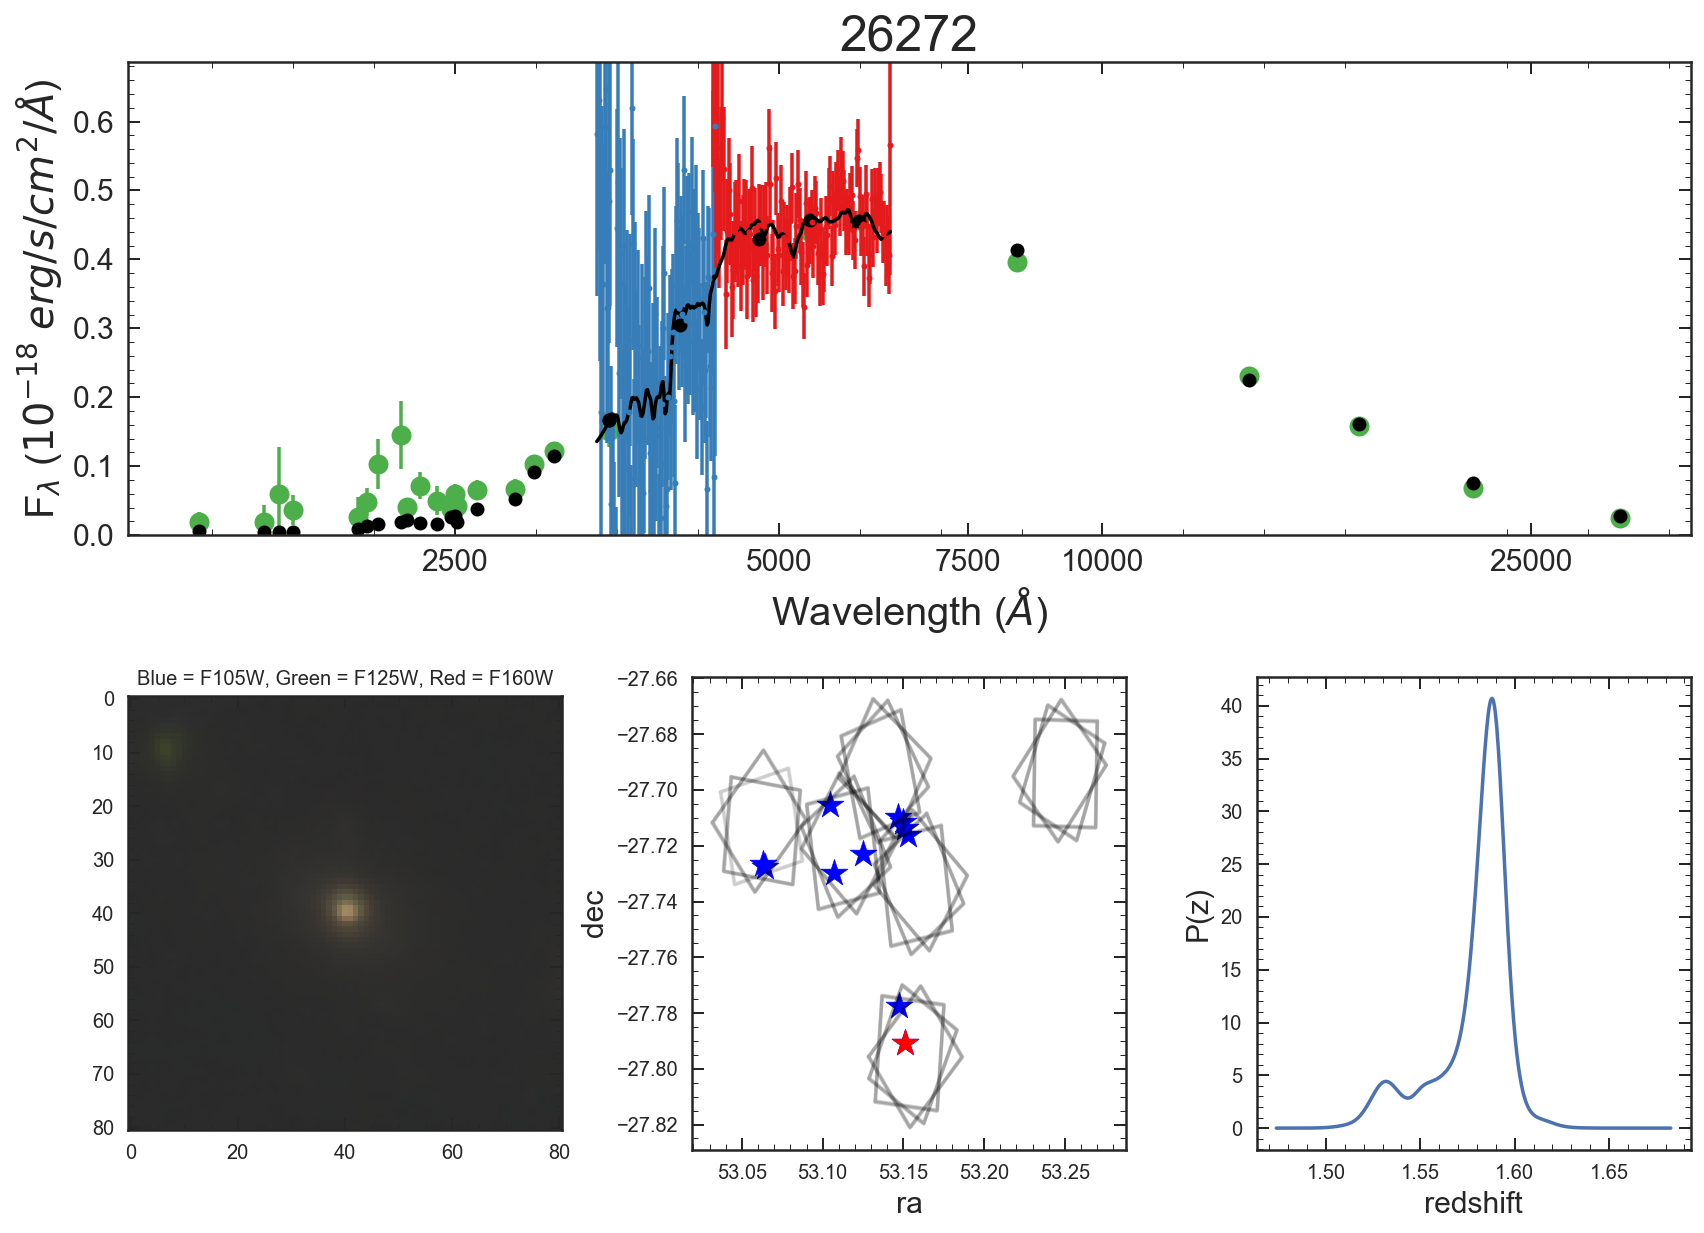

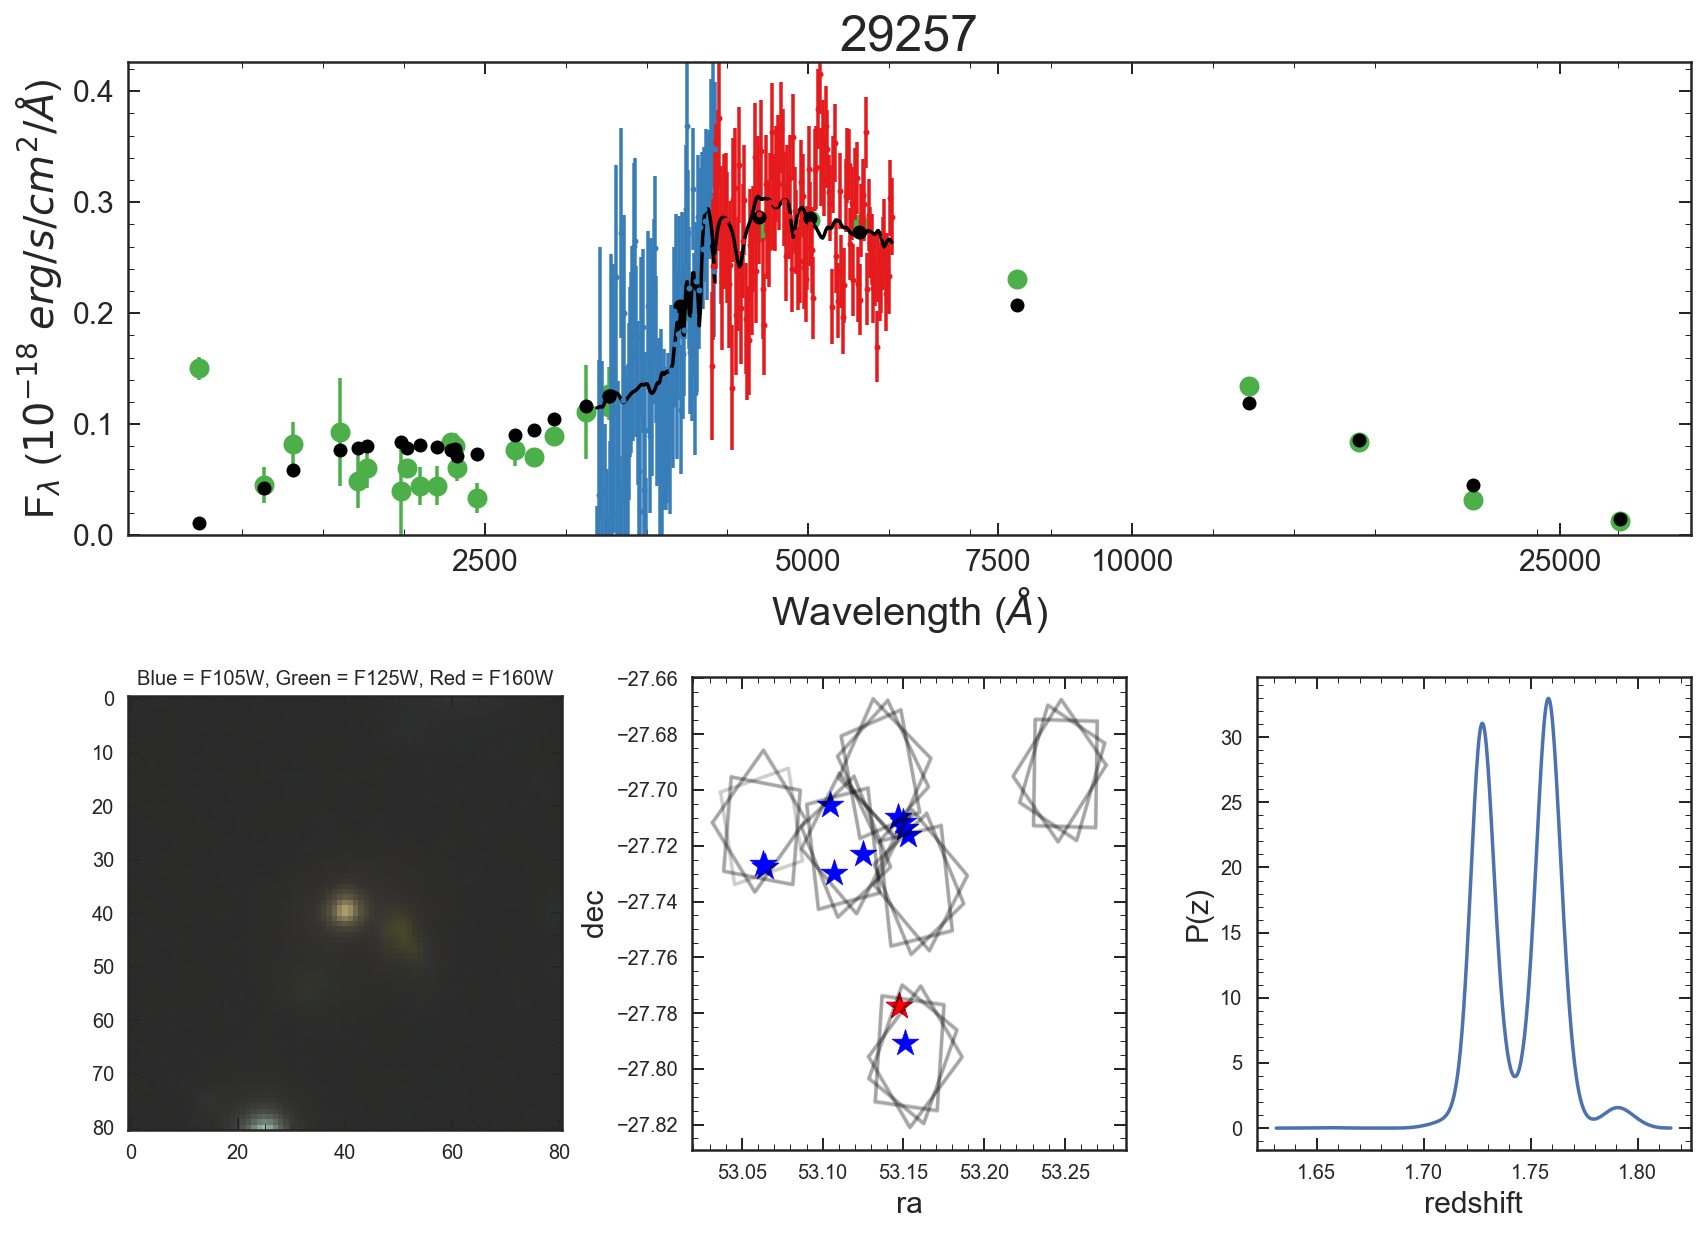

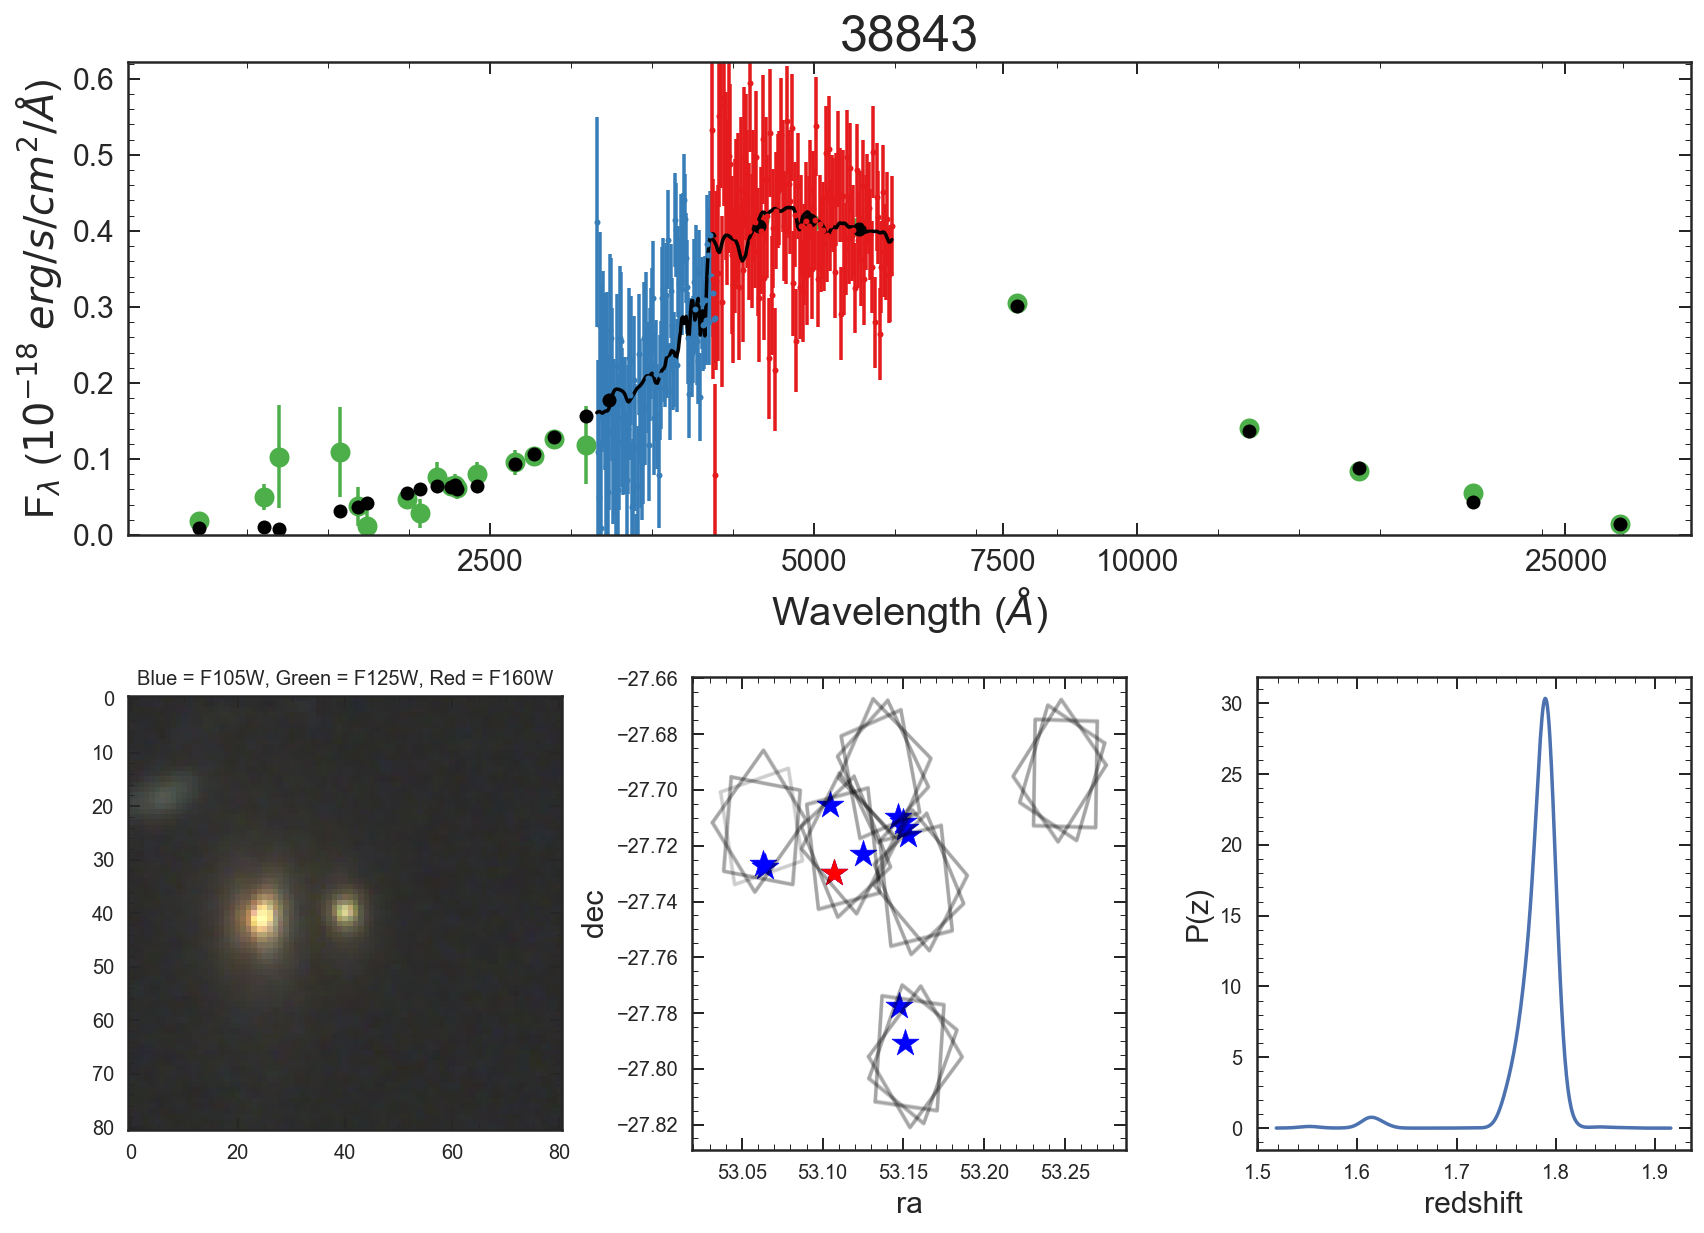

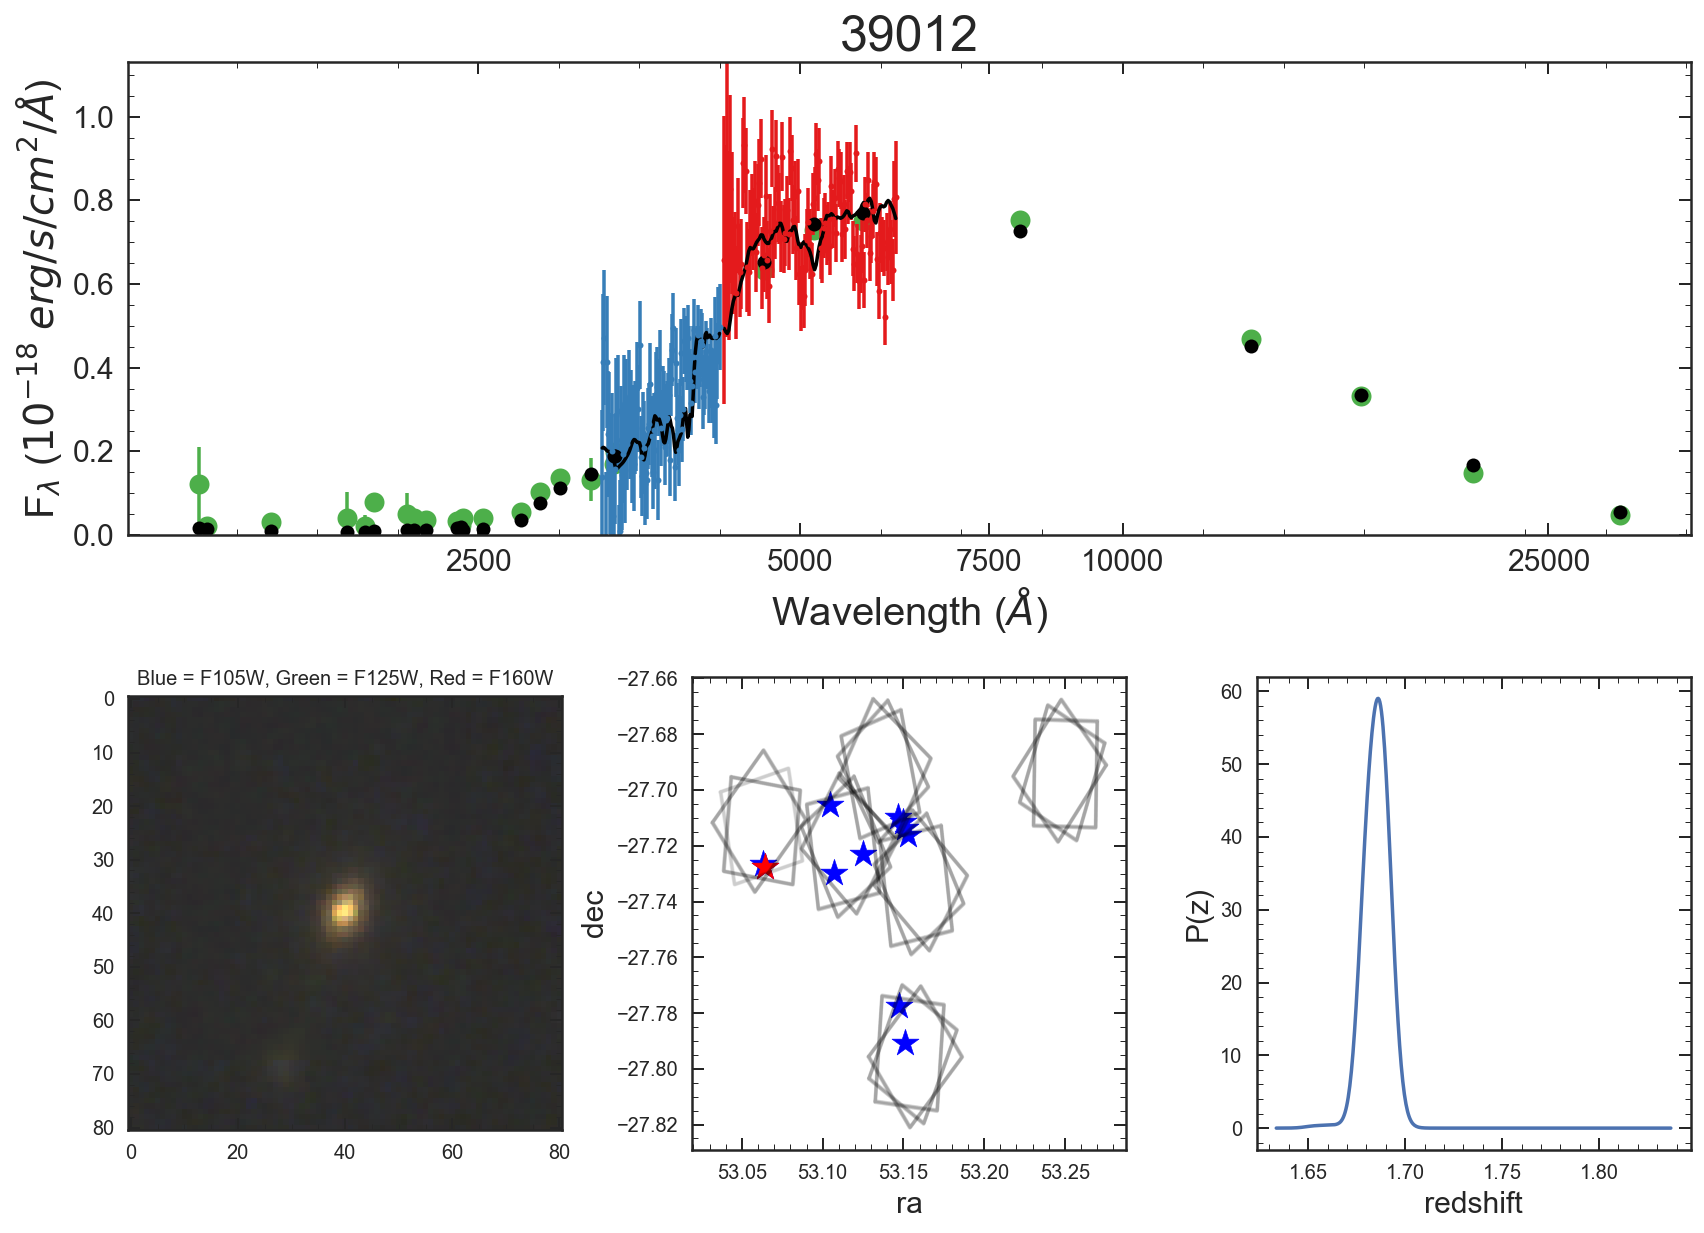

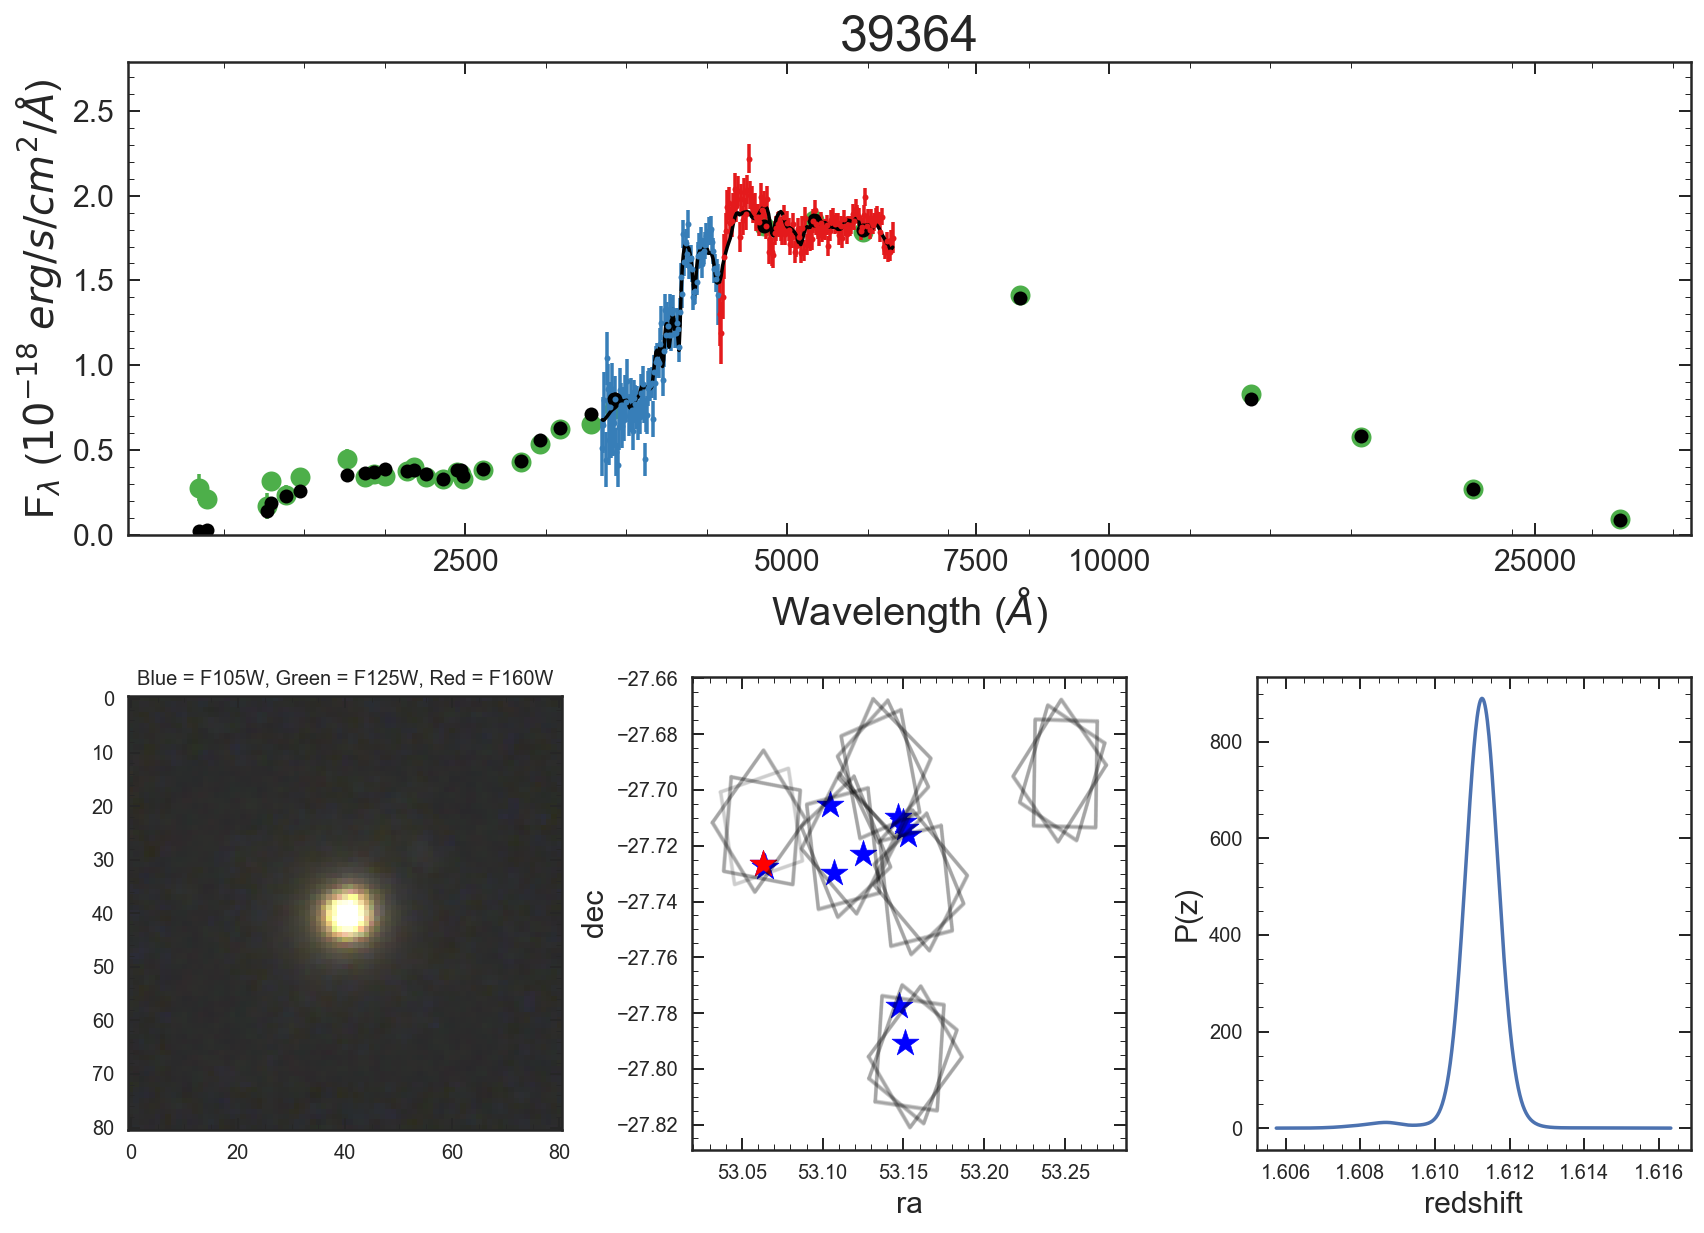

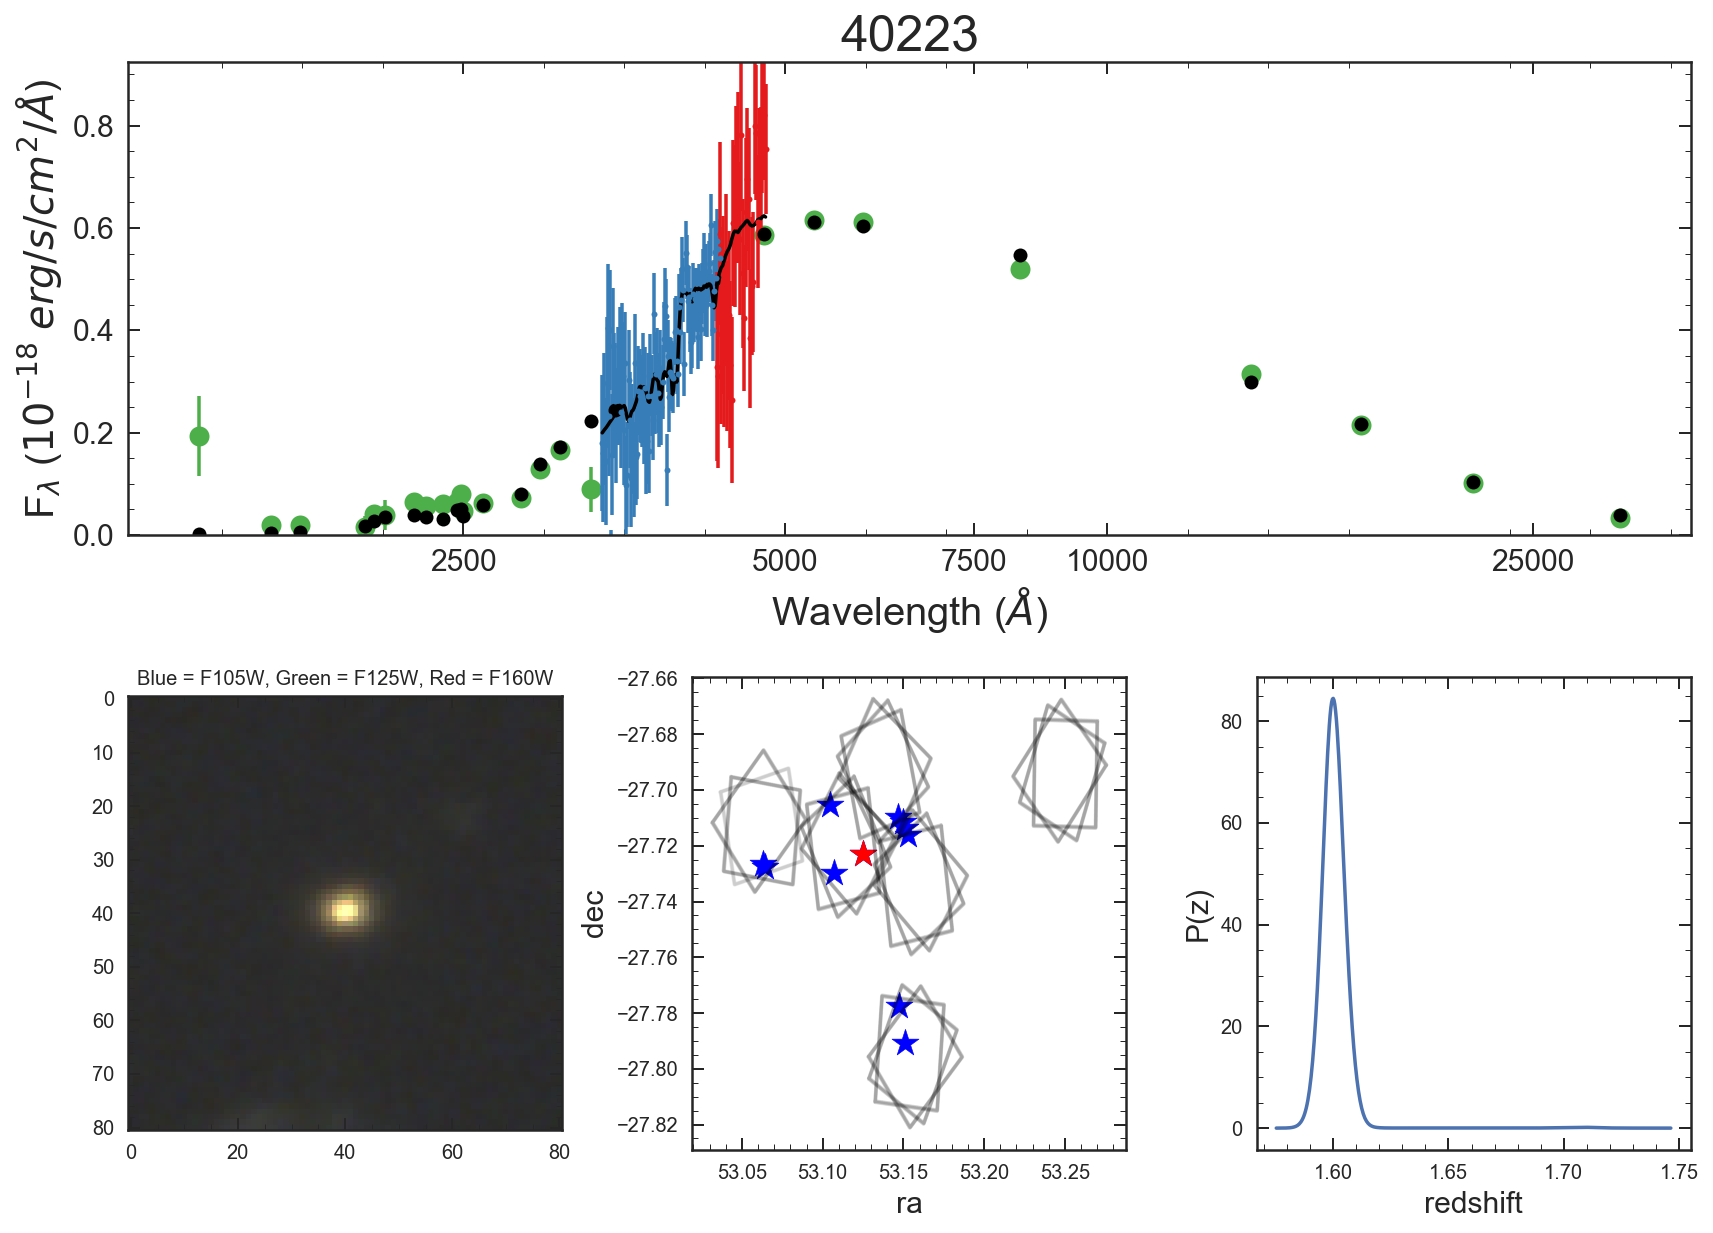

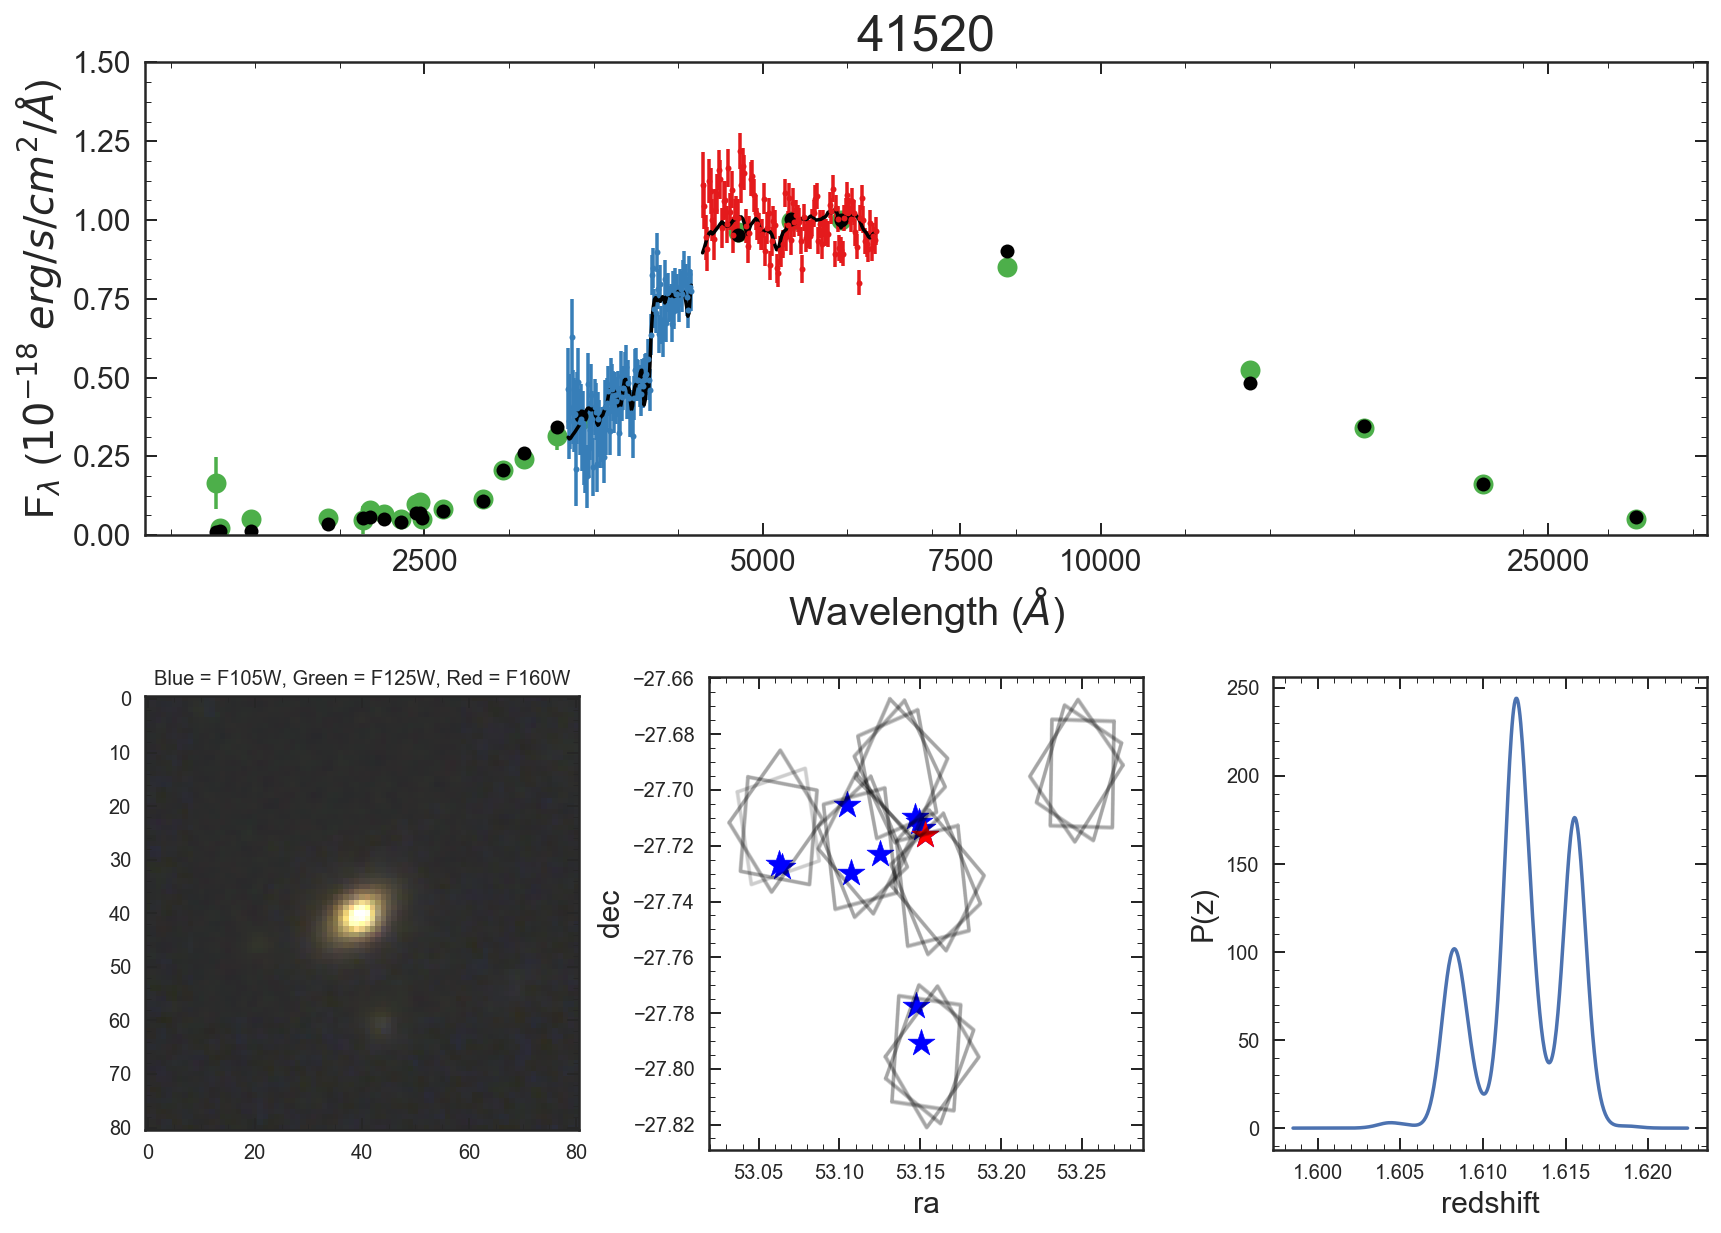

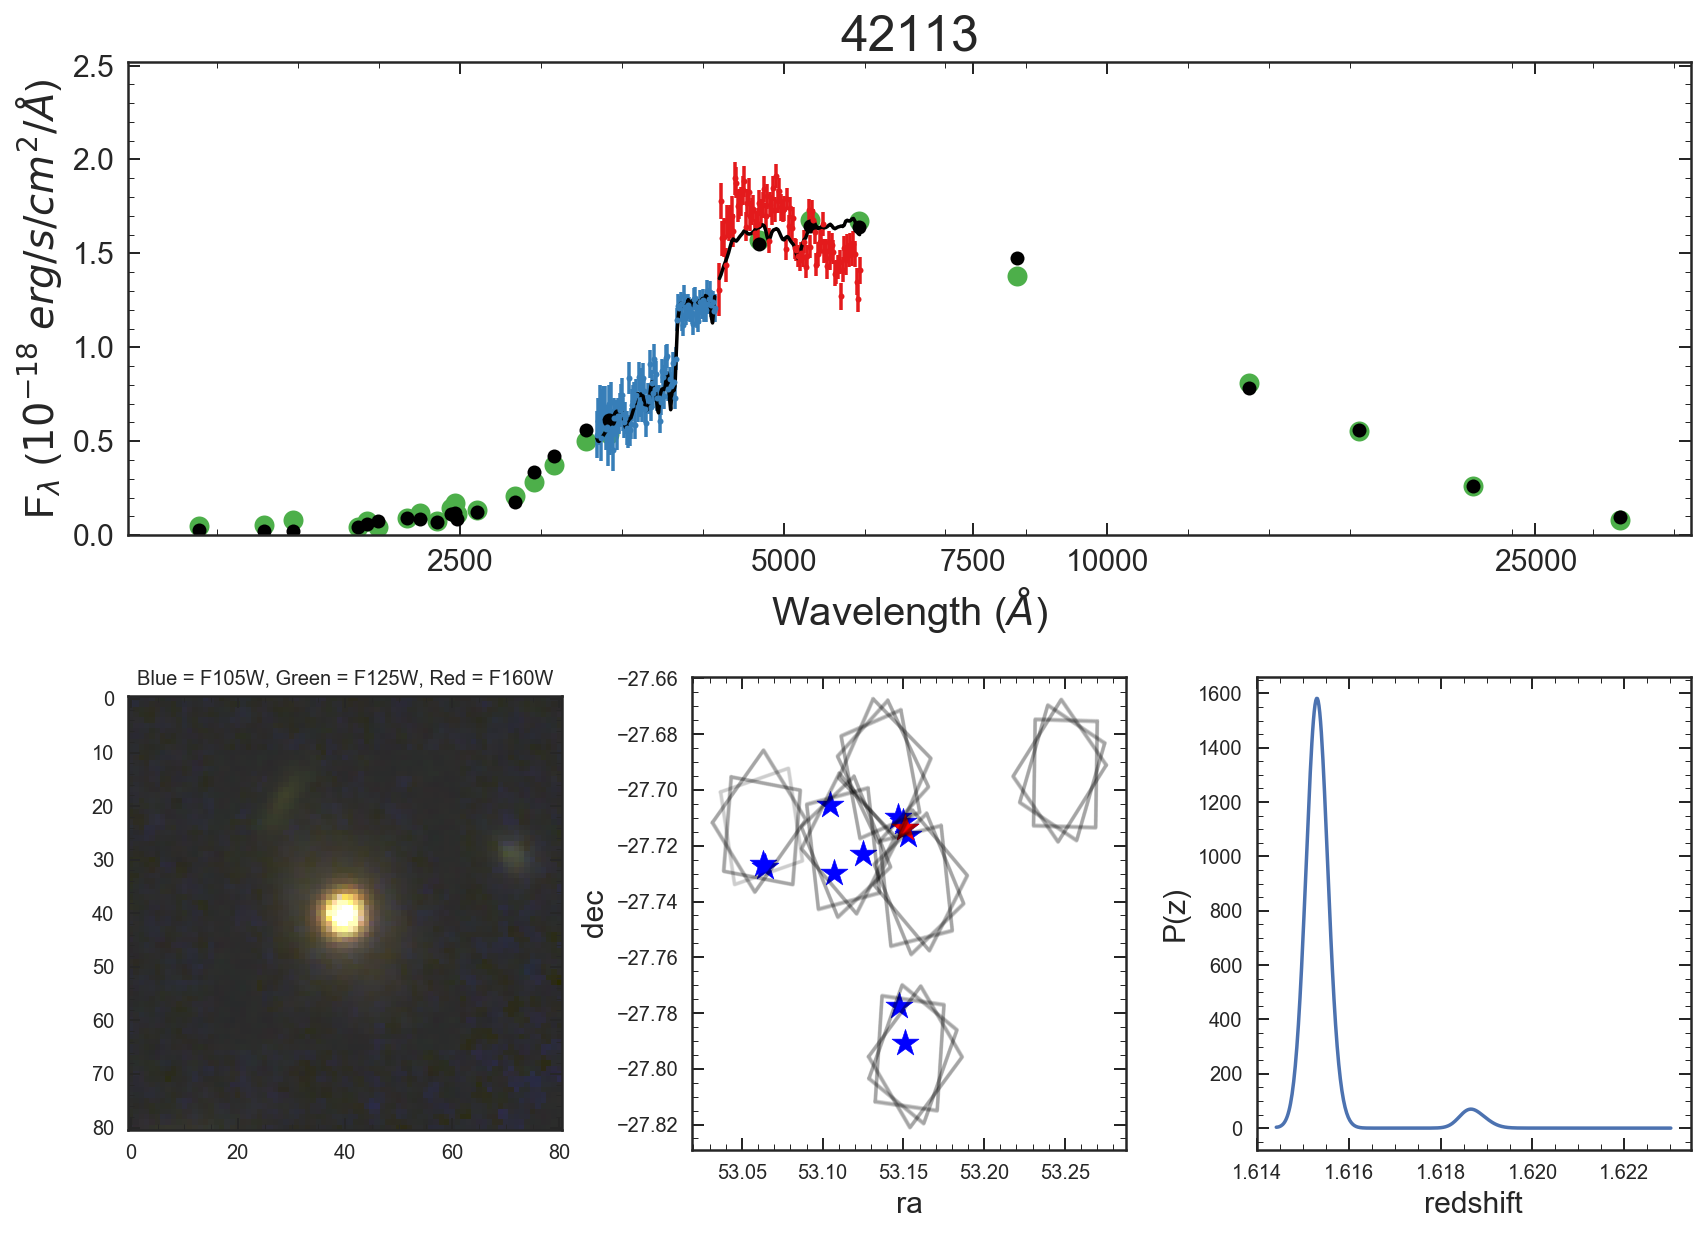

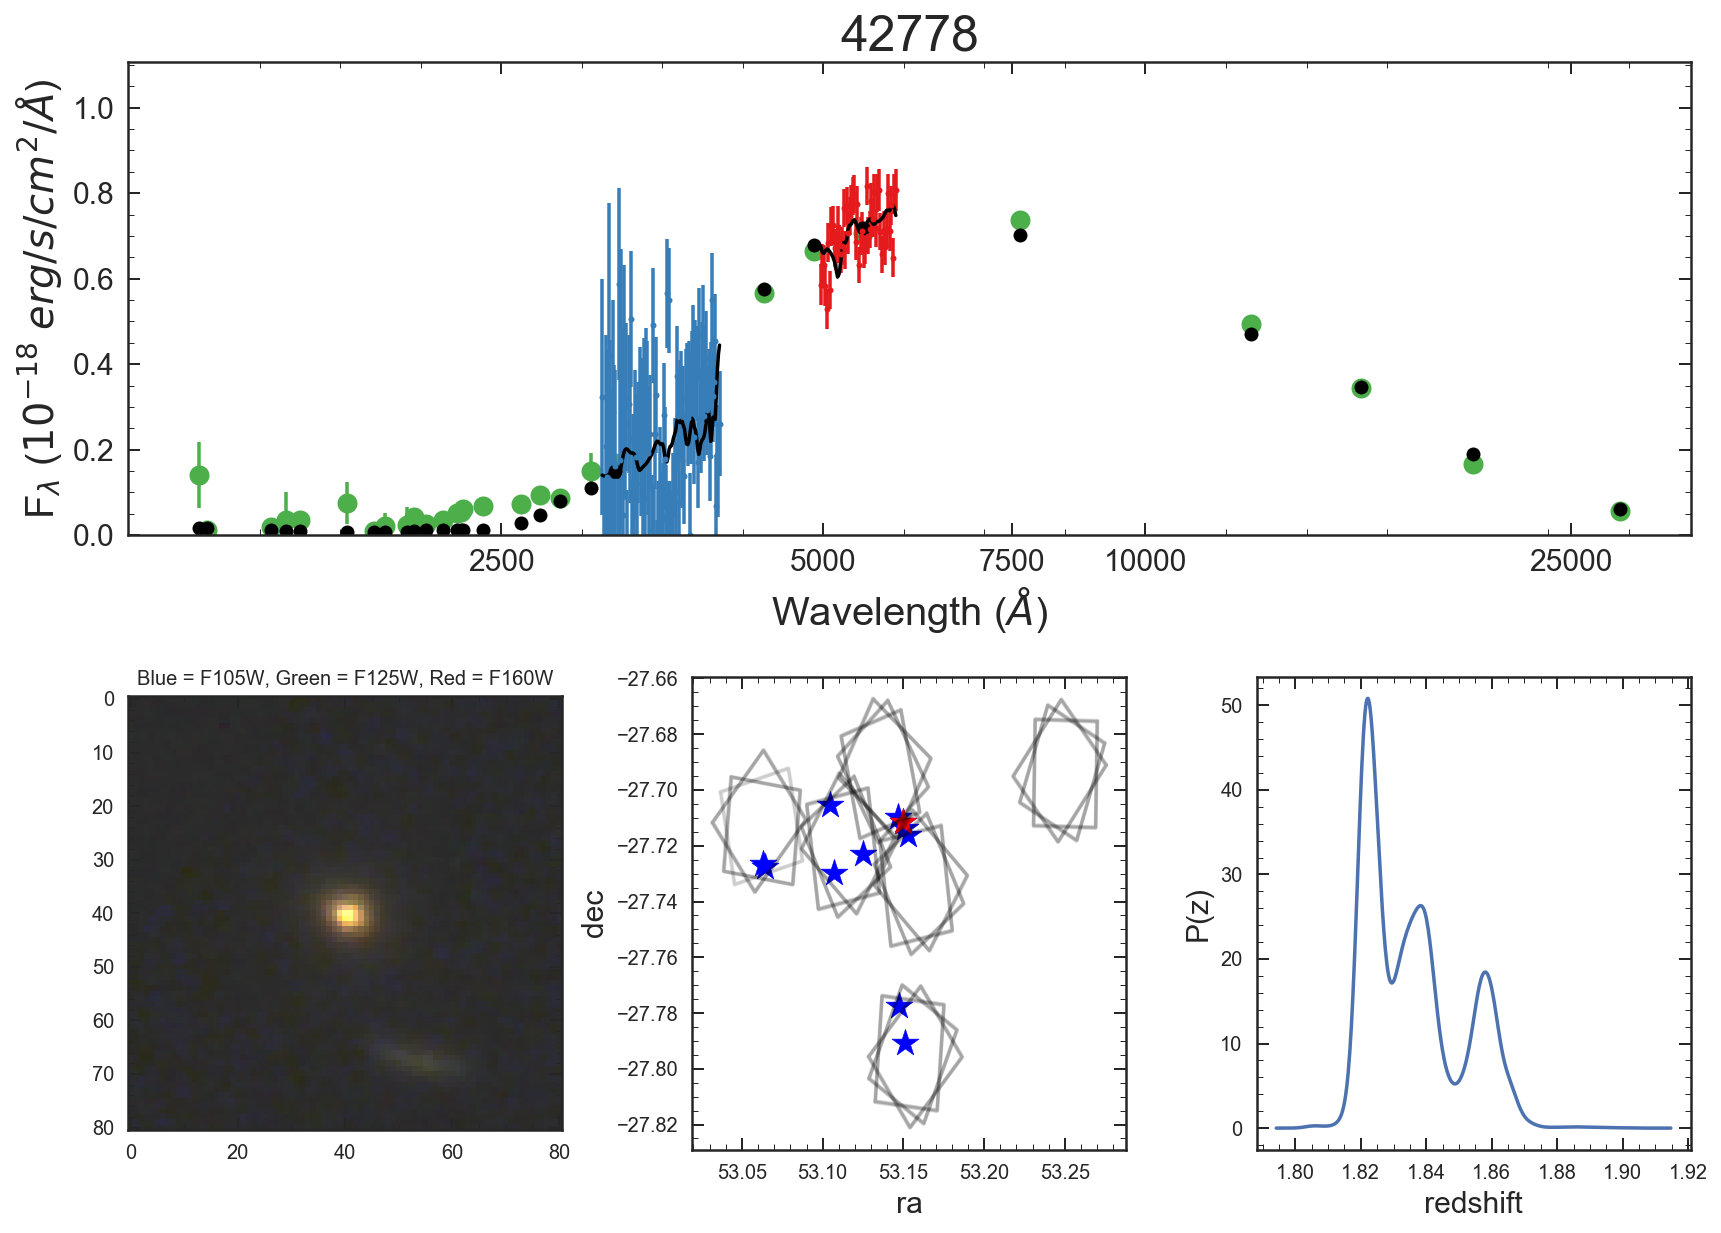

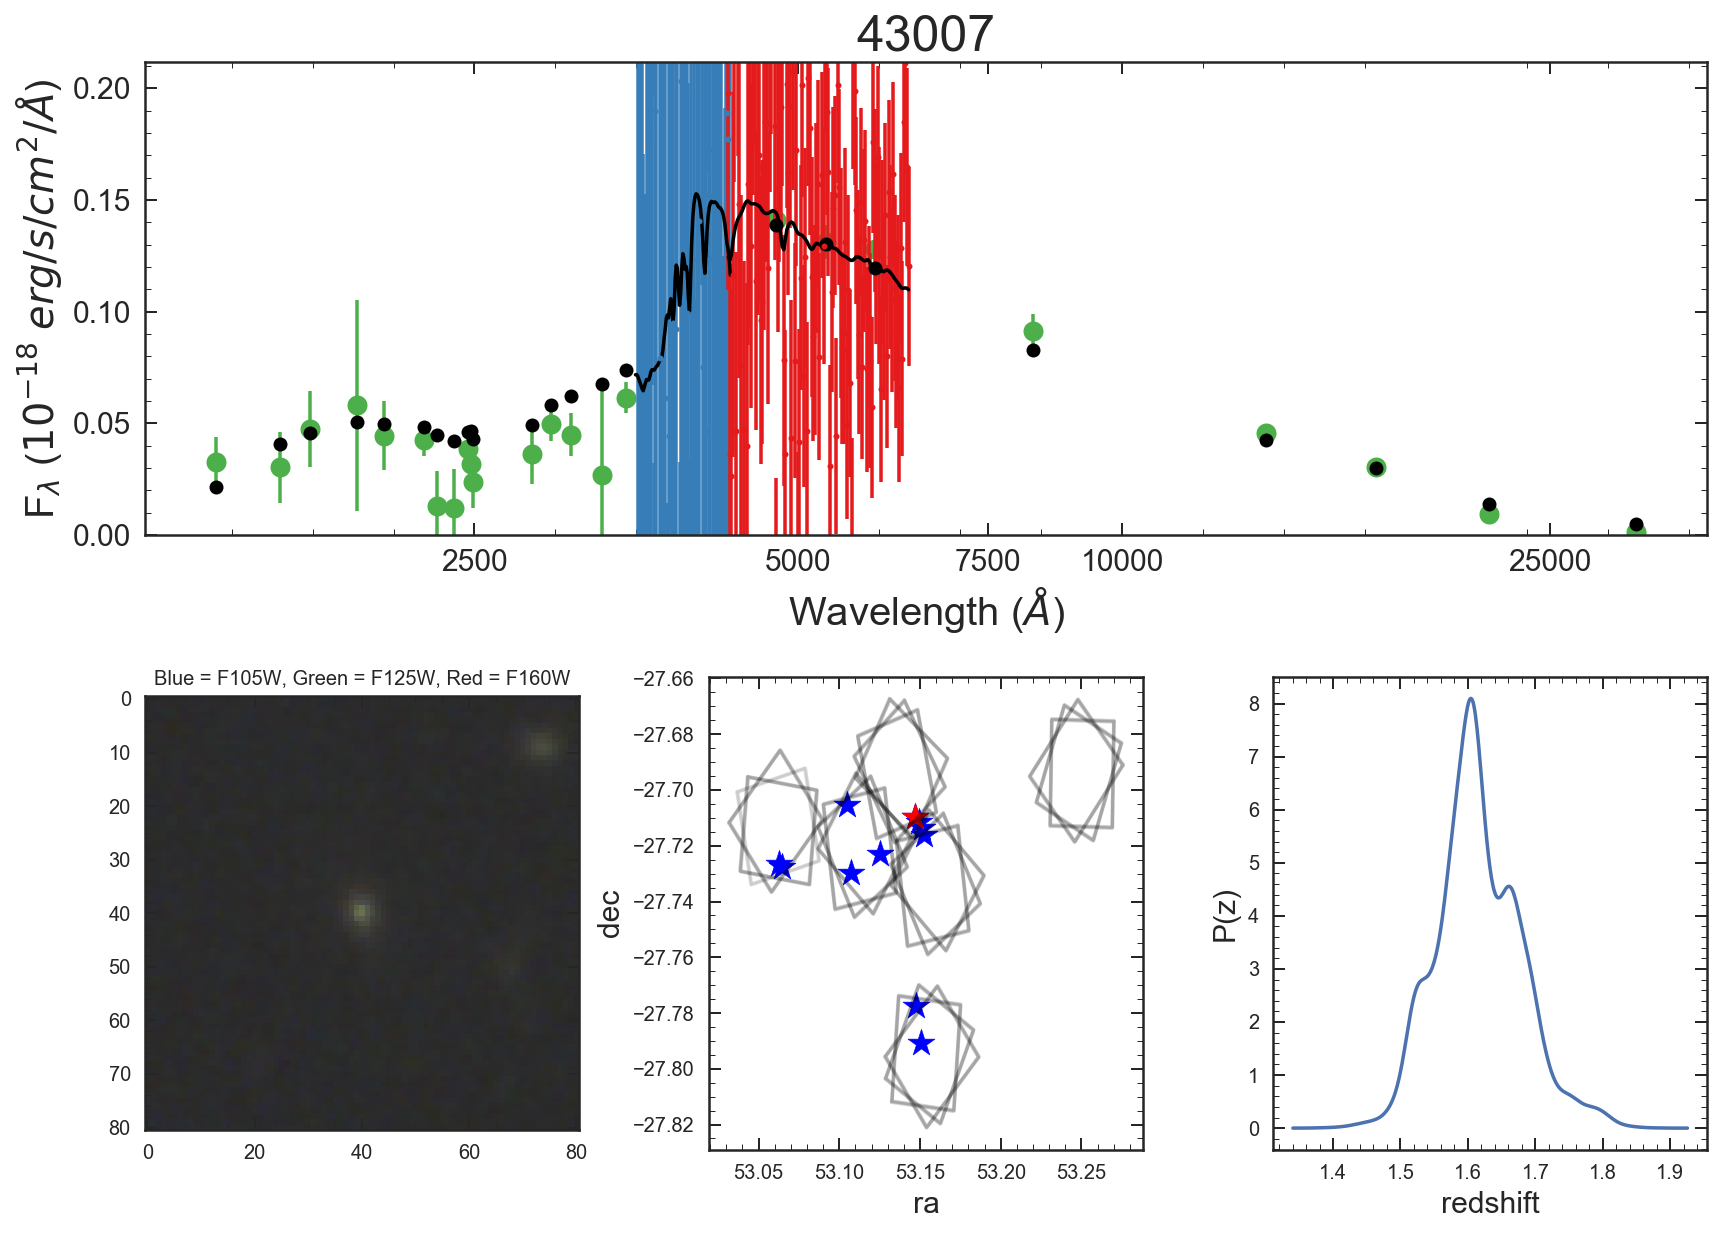

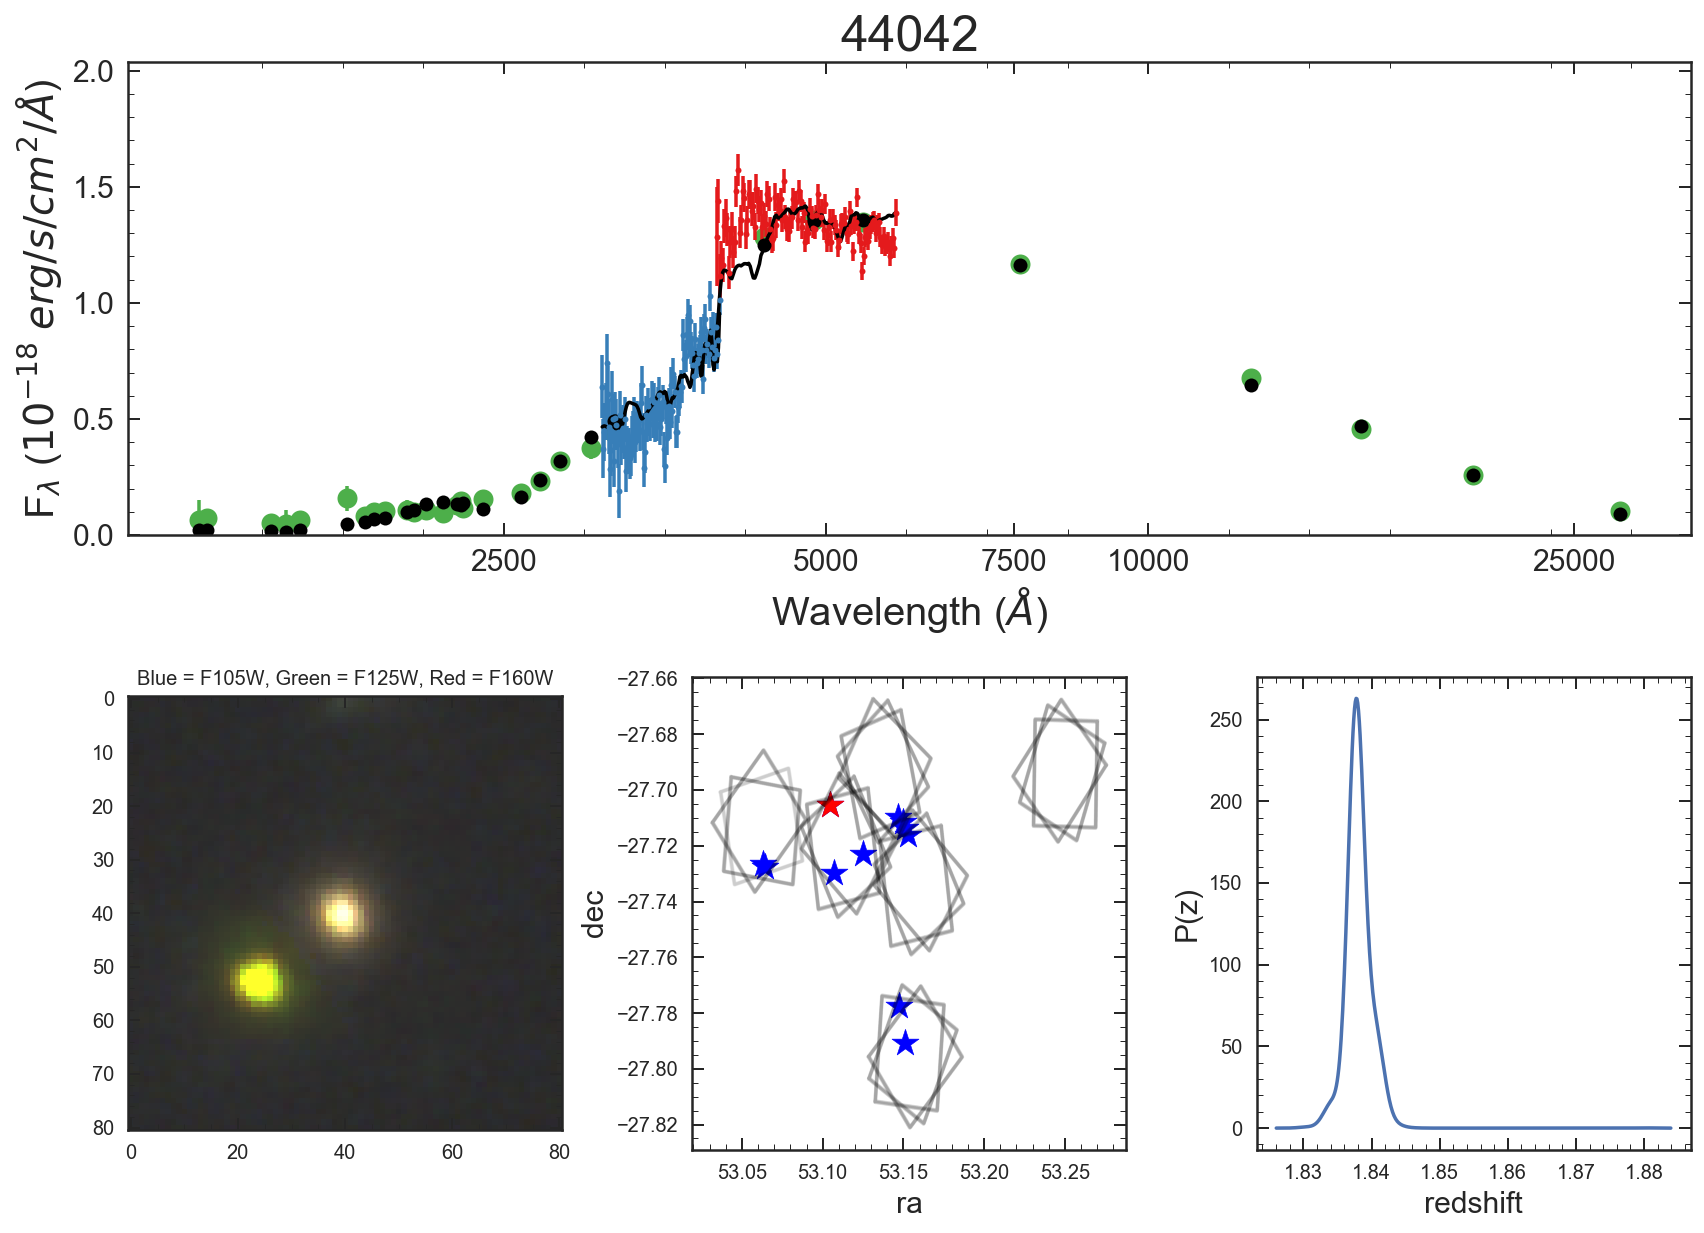

In [38]:
gals = [26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,43007, 44042]

LIMSR = [None, None, None, None, None, [11200,12500], None, [11200,15400], [14000,16500], None, None]

for i in range(len(gals)):
    if LIMSR[i] == None:
        lim1 = 11200
        lim2 = 16500
    else:
        lim1 = LIMSR[i][0]
        lim2 = LIMSR[i][1]

    PLOT(gals[i], [lim1,lim2], savefig = False)    
#     PLOT(gals[i], [11200,16500], savefig = False)

# get P(z)

In [25]:
from spec_exam import Gen_ALMA_spec
import dynesty
import matplotlib.pyplot as plt
from dynesty import plotting as dyplot
from dynesty.utils import quantile as _quantile
from scipy.ndimage import gaussian_filter as norm_kde
from multiprocessing import Pool
from scipy import stats
import fsps
from sim_engine import *

In [26]:
# CLIPR = [None, None, None, None, None, [12500,80000], None, [15400,80000], [8000,14000], None, None]

LIMSR = [None, None, None, None, None, [11200,12500], None, [11200,15400], [14000,16500], None, None]

v4S.id[SQ_up].values, LIMSR

(array([26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,
        43007, 44042]),
 [None,
  None,
  None,
  None,
  None,
  [11200, 12500],
  None,
  [11200, 15400],
  [14000, 16500],
  None,
  None])

In [27]:
i = 7
if LIMSR[i] == None:
    lim1 = 11200
    lim2 = 16500
else:
    lim1 = LIMSR[i][0]
    lim2 = LIMSR[i][1]

Gs = Gen_ALMA_spec(42113,1, g102_lims=[8750,11300], g141_lims=[lim1,lim2], mdl_err=False)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.8.0_4_g1153432-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:548: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


<ErrorbarContainer object of 3 artists>

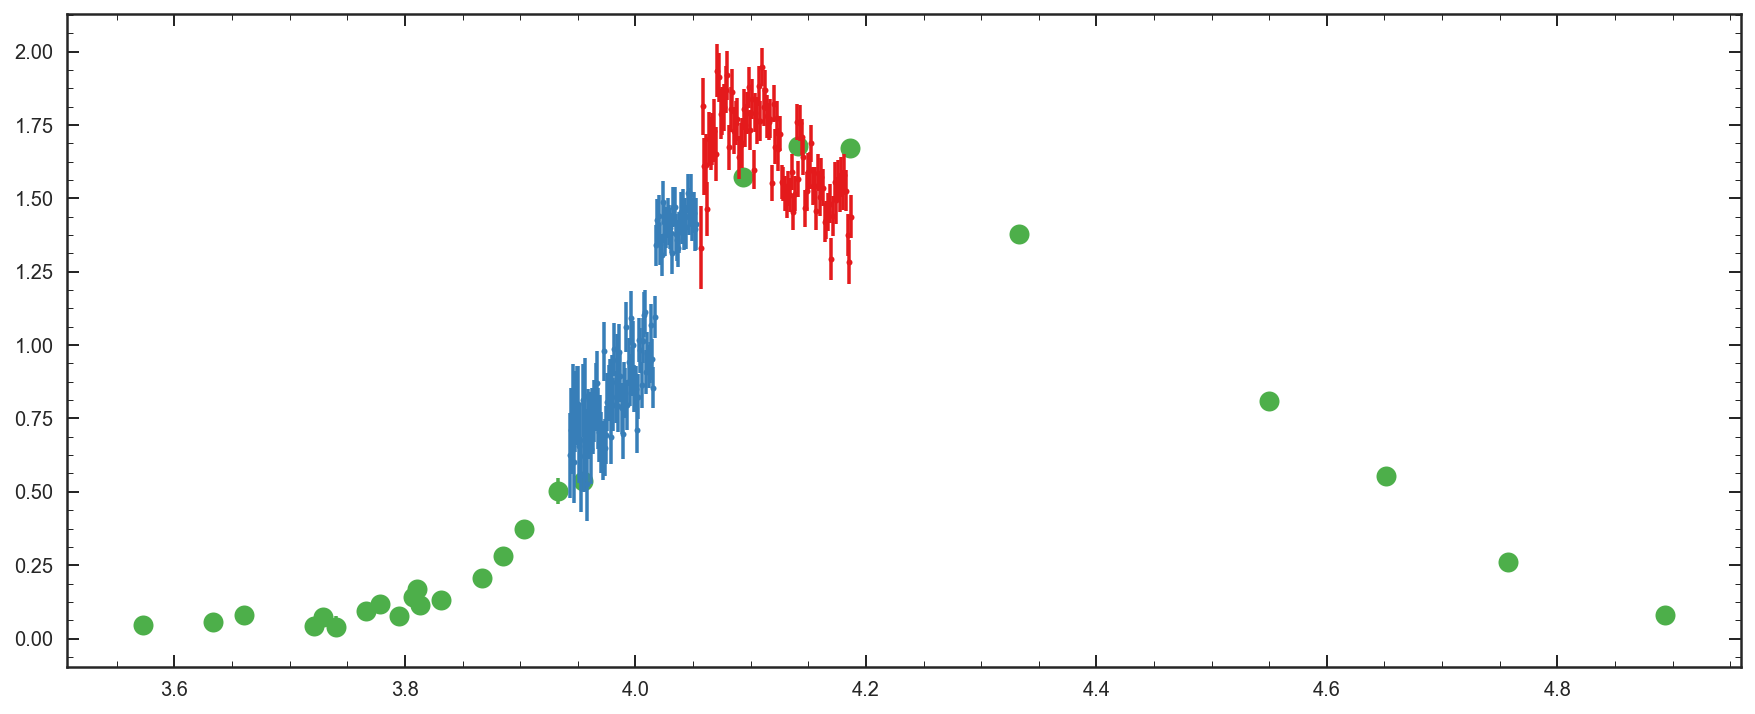

In [28]:
plt.figure(figsize=[15,6])
plt.errorbar(np.log10(Gs.Bwv),Gs.Bfl*1E18,Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8',zorder = 2, label = 'CLEAR G102')
plt.errorbar(np.log10(Gs.Rwv),Gs.Rfl*1E18,Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c',zorder = 2, label = '3D-HST G141')
plt.errorbar(np.log10(Gs.Pwv),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='o', markersize=10, color='#4daf4a',zorder = 1, label = '3D-HST Photometry')

In [5]:
from spec_tools import Oldest_galaxy

In [6]:
Oldest_galaxy(1.45)

4.535936166227886

## Set Prior and Likelihood

In [29]:
sp = fsps.StellarPopulation(imf_type = 2, tpagb_norm_type=0, zcontinuous = 1, logzsol = np.log10(1),sfh = 0)

############
###priors###
def alma_prior(u):
    m = (0.03 * u[0] + 0.001) / 0.019
    a = (2)* u[1] + 1
    z = stats.norm.ppf(u[2],loc = 1.6, scale = 0.1)

    return [m, a, z]

############
#likelihood#
def Gather_grism_sim_data(spec):
    wvs = []
    flxs = []
    errs = []
    beams = []
    trans = []
    
    if spec.g102:
        wvs.append(spec.Bwv)
        flxs.append(spec.Bfl)
        errs.append(spec.Ber)
        beams.append(spec.Bbeam)
        trans.append(spec.Btrans)
    
    if spec.g141:
        wvs.append(spec.Rwv)
        flxs.append(spec.Rfl)
        errs.append(spec.Rer)
        beams.append(spec.Rbeam)
        trans.append(spec.Rtrans)

    return np.array([wvs, flxs, errs, beams, trans])

def forward_model_all_beams(beams, trans, in_wv, model_wave, model_flux):
    FL = np.zeros([len(beams),len(in_wv)])

    for i in range(len(beams)):
        mwv, mflx = forward_model_grism(beams[i], model_wave, model_flux)
        FL[i] = interp1d(mwv, mflx)(in_wv)
        FL[i] /= trans[i]

    return np.mean(FL.T,axis=1)

def Full_forward_model(spec, wave, flux, specz):
    Gmfl = []
    
    for i in range(len(wvs)):
        Gmfl.append(forward_model_all_beams(beams[i], trans[i], wvs[i], wave * (1 + specz), flux))

    Pmfl = spec.Sim_phot_mult(wave * (1 + specz),flux)

    return np.array(Gmfl), Pmfl


def Full_fit(spec, Gmfl, Pmfl):
    Gchi = 0
    
    for i in range(len(wvs)):
        scale = Scale_model(flxs[i], errs[i], Gmfl[i])
        Gchi = Gchi + np.sum(((((flxs[i] / scale) - Gmfl[i]) / (errs[i] / scale))**2))

    Pchi = np.sum((((spec.Pflx - Pmfl) / spec.Perr)**2))
    
    return Gchi, Pchi

def Full_scale(spec, Pmfl):
    return Scale_model(spec.Pflx, spec.Perr, Pmfl)

wvs, flxs, errs, beams, trans = Gather_grism_sim_data(Gs)

def alma_L(X):
    m, a, z = X
    
    sp.params['logzsol'] = np.log10( m )

    wave, flux = sp.get_spectrum(tage = a, peraa = True)
       
    Gmfl, Pmfl = Full_forward_model(Gs, wave, flux, z)
    
    PC = Full_scale(Gs, Pmfl)

    Gchi, Pchi = Full_fit(Gs, Gmfl, PC*Pmfl)
                  
    return -0.5 * (Gchi + Pchi)


In [30]:
sampler = dynesty.DynamicNestedSampler(alma_L, alma_prior, ndim = 3, sample = 'rwalk', bound = 'single',
                                  queue_size = 8, pool = Pool(processes=8))  

Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._

In [31]:
sampler.run_nested(wt_kwargs={'pfrac': 1.0}, dlogz_init=0.01, print_progress=True,)

dres = sampler.results

iter: 20720 | batch: 6 | bound: 981 | nc: 25 | ncall: 482792 | eff(%):  4.292 | loglstar: -695.219 < -689.570 < -690.561 | logz: -708.752 +/-  0.179 | stop:  0.711            


(<Figure size 864x648 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a86093358>,
       dtype=object))

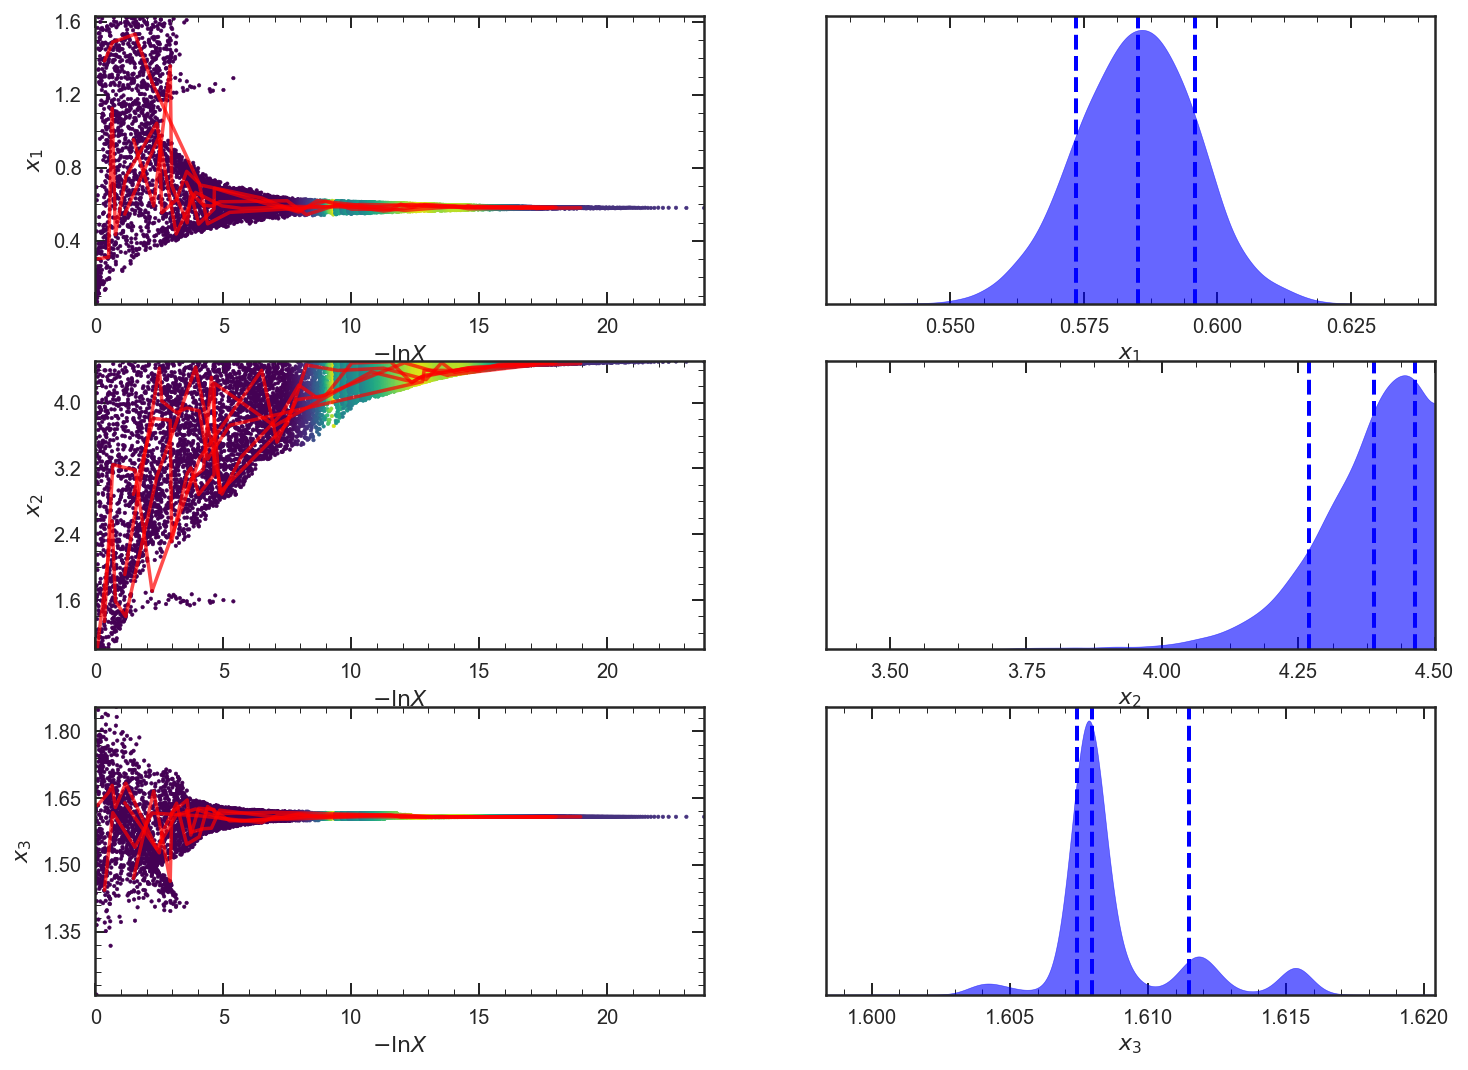

In [12]:
dyplot.traceplot(dres, truths=None, truth_color='black',
                             show_titles=False, title_kwargs={'fontsize': 5, 'y': 1.05},
                             trace_cmap='viridis', kde=False,
                             connect=True, connect_highlight=range(5))

In [13]:
def Get_posterior(results, entry):
    sample = results.samples[:, entry]
    logwt = results.logwt
    logz = results.logz
    
    
    weight = np.exp(logwt - logz[-1])

    q = [0.5 - 0.5 * 0.999999426697, 0.5 + 0.5 * 0.999999426697]
    span = _quantile(sample.T, q, weights=weight)

    s = 0.02

    bins = int(round(10. / 0.02))
    n, b = np.histogram(sample, bins=bins, weights=weight,
                        range=np.sort(span))
    n = norm_kde(n, 10.)
    x0 = 0.5 * (b[1:] + b[:-1])
    y0 = n
    
    return x0, y0 / np.trapz(y0,x0)

In [14]:
z,Pz = Get_posterior(dres,2)

(1.5, 1.7)

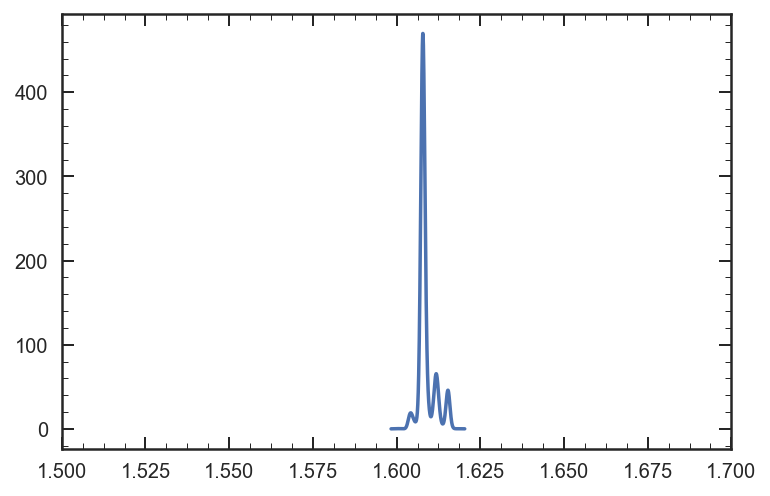

In [21]:
plt.plot(z,Pz)
plt.xlim(1.5,1.7)

In [16]:
from spec_stats import Highest_density_region

In [24]:
Highest_density_region(Pz,z)

(1.607836490056423, 0.001024534379777231, 0.0011455493073775358)

In [22]:
dres.samples[-1]

array([0.57975329, 4.49953077, 1.60797278])

In [23]:
sp.params['logzsol'] = np.log10( 0.57975 )

wave, flux = sp.get_spectrum(tage = 4.5, peraa = True)

In [25]:
Gs.Sim_all_premade(wave * (1 + 1.60797),flux)

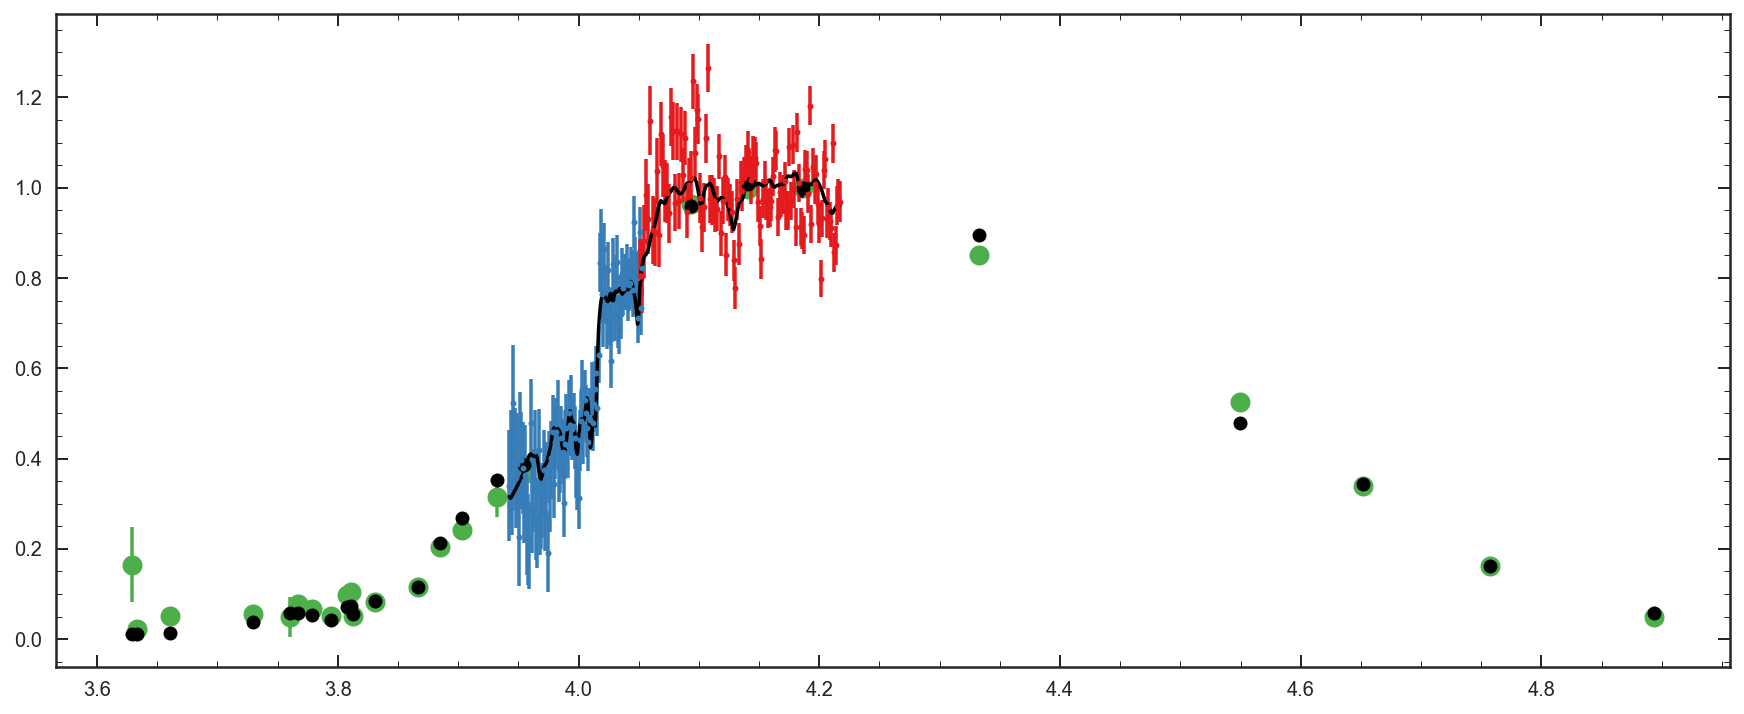

In [26]:
plt.figure(figsize=[15,6])
plt.errorbar(np.log10(Gs.Bwv),Gs.Bfl*1E18,Gs.Ber*1E18,
                linestyle='None', marker='o', markersize=3, color='#377eb8',zorder = 2, label = 'CLEAR G102')
plt.errorbar(np.log10(Gs.Rwv),Gs.Rfl*1E18,Gs.Rer*1E18,
                linestyle='None', marker='o', markersize=3, color='#e41a1c',zorder = 2, label = '3D-HST G141')
plt.errorbar(np.log10(Gs.Pwv),Gs.Pflx*1E18,Gs.Perr*1E18,
                                 linestyle='None', marker='o', markersize=10, color='#4daf4a',zorder = 1, label = '3D-HST Photometry')

plt.plot(np.log10(Gs.Bwv),Gs.Bmfl*1E18,'k')
plt.plot(np.log10(Gs.Rwv),Gs.Rmfl*1E18,'k')
plt.plot(np.log10(Gs.Pwv),Gs.Pmfl*1E18,'ko')

# P(z)

In [34]:
pzs = glob('../data/posteriors/ALMA_*Pz*')

[1.58806819]
[1.75816612]
[1.78927709]
[1.68611349]
[1.61125513]
[1.60002434]
[1.61204565]
[1.61529091]
[1.82220093]
[1.60426942]
[1.83774292]


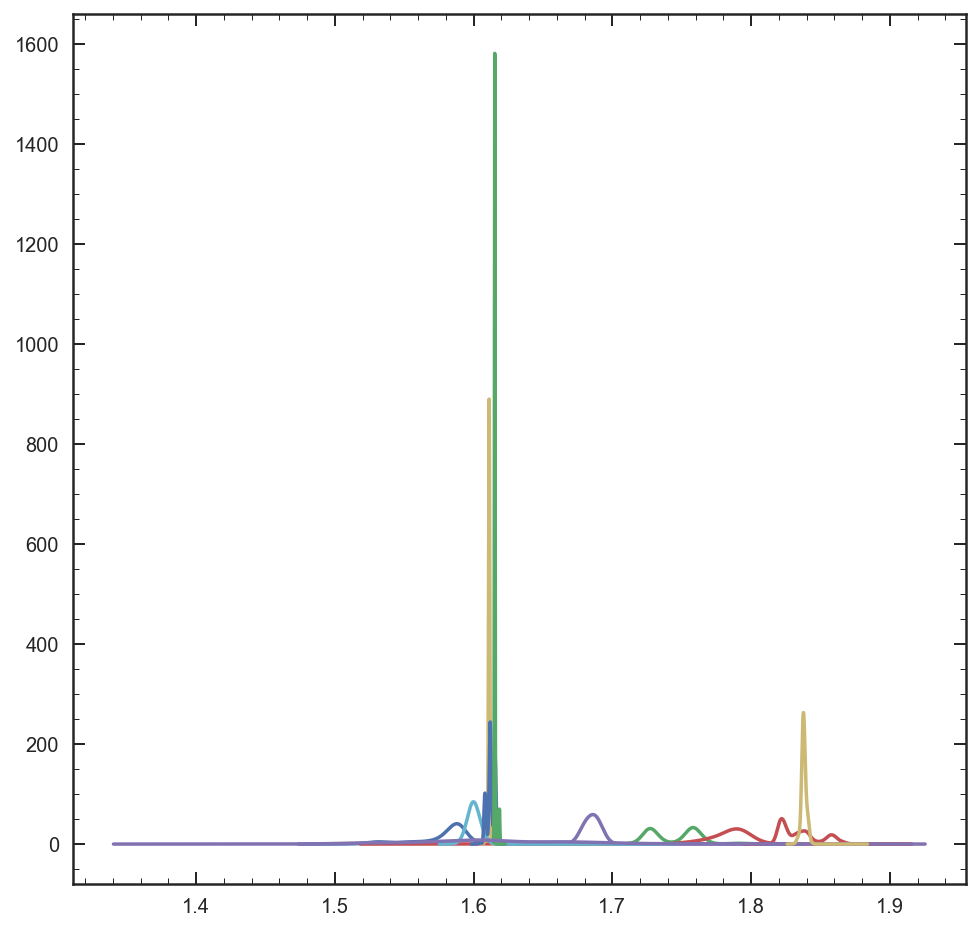

In [37]:
plt.figure(figsize=[8,8])
for i in pzs:
    z,pz = np.load(i)
    print(z[pz == max(pz)])
    plt.plot(z,pz)

In [3]:
gals = [26272, 29257, 38843, 39012, 39364, 40223, 41520, 42113, 42778,43007, 44042]

LIMSR = [None, None, None, None, None, [11200,12500], None, [11200,15400], [14000,16500], None, None]

In [40]:
from spec_stats import Highest_density_region

112.14961588645433 1.5880680589181768
119.5205311559175 1.758166103598096
120.86867333128573 1.7892770768758246
116.39824459207611 1.6861133367402181
113.15438926290531 1.6112551368362766
112.66771829674649 1.6000242683864572
113.18864408852465 1.6120456328121073
113.32927313450914 1.6152909184886723
122.29536988547052 1.8222008435108579
112.85166609448629 1.6042692175650681
122.96886066211414 1.83774293835648


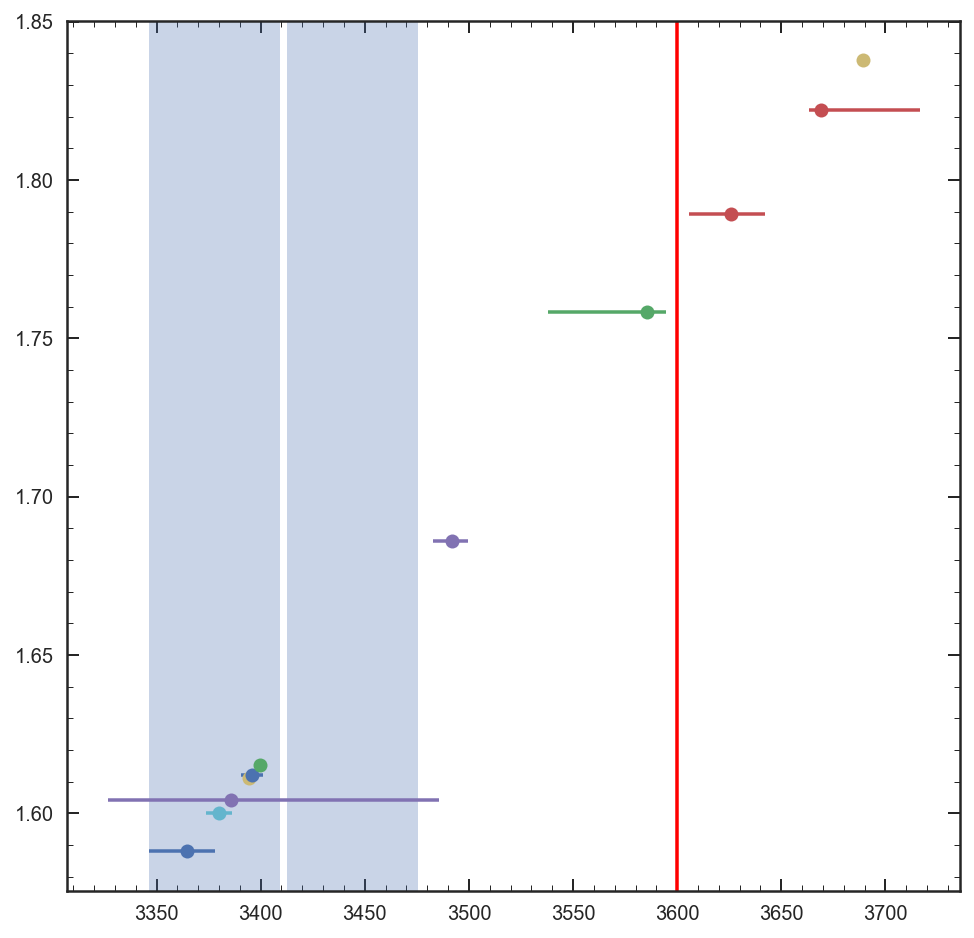

In [72]:
pzs = glob('../data/posteriors/ALMA_*Pz*')

co12 = 1300 # micron

plt.figure(figsize=[8,8])
for i in range(len(gals)):
    z,pz = np.load('../data/posteriors/ALMA_{0}_Pz.npy'.format(gals[i]))
    rshift, rl, rh = Highest_density_region(pz,z)

    loc = co12 * (1 + rshift)
    print(loc / 30, rshift)
    plt.errorbar(loc , rshift, xerr=[[loc - co12 * (1 + rshift - rl)],[co12 * (1 + rshift + rh) - loc]], fmt='o' )

plt.axvspan(11.26 * 3E2 - 31.5,11.26 * 3E2 + 31.5,alpha = 0.3)

plt.axvspan(11.48 * 3E2 - 31.5,11.48 * 3E2 + 31.5,alpha = 0.3)

plt.axvline(3600, color='r')

In [53]:
[[co12 * (1 + rshift - rl)],[co12 * (1 + rshift + rh)]]

[[3373.891967883109], [3386.272752106607]]

In [70]:
3600 / 30

120.0

In [27]:
3048 - 2985

63

In [74]:
1300/30

43.333333333333336